# LIBRERIAS

In [1]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [64]:
%pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, HTML, Text, VBox, HBox, Layout
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.base import clone
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from scipy.stats import spearmanr
from optuna.samplers import TPESampler
import optuna
import os, json, joblib, sys, platform, time
from datetime import datetime
import warnings
import streamlit as st

In [5]:
import sys
print("Kernel Python:", sys.executable)

# instala/actualiza pip y xgboost en ESTE kernel
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U xgboost

# verifica
!{sys.executable} -m pip show xgboost

Kernel Python: c:\Users\USUARIO\anaconda3\python.exe
Name: xgboost
Version: 3.0.5
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\Users\USUARIO\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [6]:
import importlib, diccionario
importlib.reload(diccionario)  # por si quedó en caché

print('¿Está diccionario_variables?:', hasattr(diccionario, 'diccionario_variables'))
print([n for n in dir(diccionario) if not n.startswith('_')][:20])

¿Está diccionario_variables?: True
['cargar_diccionario', 'diccionario_variables', 'math', 'pd', 're', 'reglas_por_parametro']


In [7]:
import importlib, diccionario
importlib.reload(diccionario)
len(diccionario.diccionario_variables), len(diccionario.reglas_por_parametro)


(53, 53)

In [8]:
df = pd.read_csv('Calidad_del_agua_del_Rio_Cauca.csv', sep=';')

df.head()

FECHA DE MUESTREO        ESTACIONES   pH TEMPERATURA (°C) COLOR (UPC)  \
0  12/19/1998 12:00:00 AM            YOTOCO  7.1              4.1         NaN   
1  12/19/1998 12:00:00 AM        MEDIACANOA    7                2         NaN   
2  12/19/1998 12:00:00 AM  PASO DE LA TORRE    7             22.9         NaN   
3          5/09/1990 0:00      ANTES SUAREZ  6.6              NaN         NaN   
4          1/10/1990 0:00  ANTES RIO OVEJAS  6.7              NaN         NaN   

  TURBIEDAD (UNT)  SOLIDOS TOTALES (mg SST/l)  \
0             4.1                         NaN   
1               2                         NaN   
2             3.4                         NaN   
3             NaN                       157.0   
4             NaN                       143.0   

  SOLIDOS SUSPENDIDOS TOTALES (mg SS/l) SOLIDOS DISUELTOS (mg SD/l)  \
0                                   110                         NaN   
1                                   130                         NaN   
2                                 153.3                         NaN   
3                                  29.3                       127.7   
4                                    65                          78   

  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  ... CROMO TOTAL (mg Cr/l)  \
0                                     4.2  ...                   NaN   
1                                       3  ...                   NaN   
2                                       5  ...                   NaN   
3                                     0.5  ...                   NaN   
4                                     2.1  ...                   NaN   

  CROMO DISUELTO (mg Cr/l) NIQUEL TOTAL (mg Ni/l) NIQUEL DISUELTO (mg Ni/l)  \
0                      NaN                    NaN                       NaN   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                      0                       NaN   
4                      NaN                    NaN                       NaN   

  PLOMO TOTAL (mg Pb/l) PLOMO DISUELTO (mg Pb/l) MERCURIO (µg Hg/l)  \
0                   NaN                      NaN                NaN   
1                   NaN                      NaN                NaN   
2                   NaN                      NaN                NaN   
3                   NaN                      NaN                NaN   
4                   NaN                      NaN                NaN   

  COLIFORMES TOTALES (NMP/100 ml) COLIFORMES FECALES (NMP/100 ml)  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                        2.4*10E4                              23   
4                        2.4*10E4                         24*10E4   

  CAUDAL (m3/s)  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 56 columns]

In [9]:
df_sin_columnas = df.drop(columns=['FECHA DE MUESTREO', 'ESTACIONES'])
df_sin_columnas.head()

pH TEMPERATURA (°C) COLOR (UPC) TURBIEDAD (UNT)  \
0  7.1              4.1         NaN             4.1   
1    7                2         NaN               2   
2    7             22.9         NaN             3.4   
3  6.6              NaN         NaN             NaN   
4  6.7              NaN         NaN             NaN   

   SOLIDOS TOTALES (mg SST/l) SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)  \
0                         NaN                                   110   
1                         NaN                                   130   
2                         NaN                                 153.3   
3                       157.0                                  29.3   
4                       143.0                                    65   

  SOLIDOS DISUELTOS (mg SD/l) DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  \
0                         NaN                                     4.2   
1                         NaN                                       3   
2                         NaN                                       5   
3                       127.7                                     0.5   
4                          78                                     2.1   

  DEMANDA QUIMICA DE OXIGENO (mg O2/l) OXIGENO DISUELTO (mg O2/l)  ...  \
0                                  NaN                        1.5  ...   
1                                  NaN                       1.81  ...   
2                                  NaN                          2  ...   
3                                  5.2                        5.6  ...   
4                                   24                          6  ...   

  CROMO TOTAL (mg Cr/l) CROMO DISUELTO (mg Cr/l) NIQUEL TOTAL (mg Ni/l)  \
0                   NaN                      NaN                    NaN   
1                   NaN                      NaN                    NaN   
2                   NaN                      NaN                    NaN   
3                   NaN                      NaN                      0   
4                   NaN                      NaN                    NaN   

  NIQUEL DISUELTO (mg Ni/l) PLOMO TOTAL (mg Pb/l) PLOMO DISUELTO (mg Pb/l)  \
0                       NaN                   NaN                      NaN   
1                       NaN                   NaN                      NaN   
2                       NaN                   NaN                      NaN   
3                       NaN                   NaN                      NaN   
4                       NaN                   NaN                      NaN   

  MERCURIO (µg Hg/l) COLIFORMES TOTALES (NMP/100 ml)  \
0                NaN                             NaN   
1                NaN                             NaN   
2                NaN                             NaN   
3                NaN                        2.4*10E4   
4                NaN                        2.4*10E4   

  COLIFORMES FECALES (NMP/100 ml)  CAUDAL (m3/s)  
0                             NaN            NaN  
1                             NaN            NaN  
2                             NaN            NaN  
3                              23            NaN  
4                         24*10E4            NaN  

[5 rows x 54 columns]

In [10]:
# Visor de diccionario (Excel)

import math, re
import pandas as pd
from ipywidgets import Text, Dropdown, HTML, VBox, HBox, Layout
from IPython.display import display

# parseo de rangos con inclusividad
def _parse_bands(cell: str):
    """
    Devuelve lista de dicts con límites e inclusividad.
    Soporta: 'a - b' (ambos inclusivos), '> a', '≥ a', '< a', '≤ a'.
    Ej:
      '121 - 180' -> {'lo':121,'hi':180,'lo_inc':True,'hi_inc':True}
      '> 180'     -> {'lo':180,'hi':+inf,'lo_inc':False,'hi_inc':False}
      '≤ 50'      -> {'lo':-inf,'hi':50,'lo_inc':False,'hi_inc':True}
    """
    if not isinstance(cell, str):
        return []
    t = cell.strip().lower()
    if "no aplica" in t or "varía" in t or "varia" in t:
        return []

    out = []
    for part in re.split(r"[;,/]| o ", t):
        s = part.strip()
        if not s:
            continue

        # a - b  (interpretar como inclusivo en ambos extremos)
        m = re.match(r"^\s*(-?\d+(?:\.\d+)?)\s*[-–]\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            a, b = float(m.group(1)), float(m.group(2))
            if b < a:
                a, b = b, a
            out.append(dict(lo=a, hi=b, lo_inc=True, hi_inc=True))
            continue

        # ≥ a  /  > a
        m = re.match(r"^\s*(≥|>)\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            op, a = m.group(1), float(m.group(2))
            out.append(dict(lo=a, hi=math.inf, lo_inc=(op == "≥"), hi_inc=False))
            continue

        # ≤ a  /  < a
        m = re.match(r"^\s*(≤|<)\s*(-?\d+(?:\.\d+)?)\s*$", s)
        if m:
            op, a = m.group(1), float(m.group(2))
            out.append(dict(lo=-math.inf, hi=a, lo_inc=False, hi_inc=(op == "≤")))
            continue

    return out

def _fmt_rango(b):
    """Formatea un rango con paréntesis/brackets según inclusividad."""
    li = "[" if b["lo_inc"] else "("
    ri = "]" if b["hi_inc"] else ")"
    lo = "-∞" if b["lo"] == -math.inf else f"{b['lo']:g}"
    hi = "+∞" if b["hi"] ==  math.inf else f"{b['hi']:g}"
    return f"{li}{lo}, {hi}{ri}"

# Carga del diccionario desde Excel
def cargar_diccionario(path="diccionario.xlsx", hoja="Hoja1"):
    df = pd.read_excel(path, sheet_name=hoja)

    # localizar columnas por nombre aproximado
    col_param   = [c for c in df.columns if ("parámetro" in c.lower() or "parametro" in c.lower())][0]
    col_def     = [c for c in df.columns if ("definición" in c.lower() or "definicion" in c.lower())][0]
    col_rel     = [c for c in df.columns if ("relación"  in c.lower() or "relacion"  in c.lower())][0]
    col_ref     = [c for c in df.columns if "referencia" in c.lower()][0]

    # columnas de color (si existen en la hoja)
    col_verde   = next((c for c in df.columns if "verde"   in c.lower()), None)
    col_amar    = next((c for c in df.columns if "amarill" in c.lower()), None)
    col_naranja = next((c for c in df.columns if "naranja" in c.lower()), None)
    col_rojo    = next((c for c in df.columns if "rojo"    in c.lower()), None)

    diccionario_variables = {}
    reglas_por_parametro  = {}

    for _, r in df.iterrows():
        nombre = str(r[col_param]).strip()
        if not nombre or nombre.lower() == "nan":
            continue

        diccionario_variables[nombre] = {
            "definicion": r.get(col_def, ""),
            "relacion_contaminacion": r.get(col_rel, ""),
            "referencia": r.get(col_ref, "")
        }

        # si hay columnas de color, parsear rangos
        if all([col_verde, col_amar, col_naranja, col_rojo]):
            reglas_por_parametro[nombre] = {
                "V": _parse_bands(str(r.get(col_verde, ""))),
                "A": _parse_bands(str(r.get(col_amar, ""))),
                "N": _parse_bands(str(r.get(col_naranja, ""))),
                "R": _parse_bands(str(r.get(col_rojo, "")))
            }

    return diccionario_variables, reglas_por_parametro

# Cargar (ajusta ruta/hoja si cambian)
diccionario_variables, reglas_por_parametro = cargar_diccionario("diccionario.xlsx", "Hoja1")

# UI
todas = sorted(diccionario_variables.keys(), key=str.casefold)
buscar   = Text(placeholder='Filtrar por nombre…', description='Buscar:', layout=Layout(width='50%'))
selector = Dropdown(options=todas, description='Variable:', layout=Layout(width='70%'))

definicion  = HTML()
relacion    = HTML()
referencia  = HTML()
rangos_html = HTML()

def render():
    var  = selector.value
    info = diccionario_variables.get(var, {})

    definicion.value = f"<b>Definición</b><br>{info.get('definicion', '(sin definición)')}"
    relacion.value   = f"<b>Relación con la contaminación</b><br>{info.get('relacion_contaminacion', '(sin información)')}"
    referencia.value = f"<b>Referencia</b><br>{info.get('referencia', '(sin referencia)')}"

    # rangos por color (si existen)
    r = reglas_por_parametro.get(var)
    if r:
        partes = []
        color_emoji = {"V":"🟢", "A":"🟡", "N":"🟠", "R":"🔴"}
        for k in ["V","A","N","R"]:
            bandas = r.get(k, [])
            if bandas:
                bandas_txt = ", ".join(_fmt_rango(b) for b in bandas)
                partes.append(f"{color_emoji[k]} <b>{k}</b>: {bandas_txt}")
        rangos_html.value = "<b>Rangos por color</b><br>" + "<br>".join(partes)
    else:
        rangos_html.value = "<b>Rangos por color</b><br>(no definidos para esta variable)"

def filtrar(_):
    q = buscar.value.strip().lower()
    opciones = [v for v in todas if q in v.lower()] or todas
    selector.options = opciones
    if selector.value not in opciones:
        selector.value = opciones[0]

buscar.observe(filtrar, names='value')
selector.observe(lambda _: render(), names='value')

# primera renderización y despliegue
render()
ui = VBox([
    HBox([buscar]),
    HBox([selector]),
    HTML("<hr>"),
    definicion, HTML("<br>"),
    relacion,   HTML("<br>"),
    referencia, HTML("<br>"),
    rangos_html
])
display(ui)

# EDA

In [11]:
# Copiar el dataframe
df_eda = df_sin_columnas.copy()

# Convertir todas las columnas a números, reemplazando la coma decimal
for columna in df_eda.columns:
    df_eda[columna] = pd.to_numeric(
        df_eda[columna].astype(str).str.replace(',', '.'), 
        errors='coerce'
    )

# Eliminar columnas que estén completamente vacías
df_eda.dropna(axis='columns', how='all', inplace=True)

# Confirmar que los datos están limpios (sin nulos y con tipos numéricos)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   pH                                       2208 non-null   float64
 1   TEMPERATURA (°C)                         1956 non-null   float64
 2   COLOR (UPC)                              1882 non-null   float64
 3   TURBIEDAD (UNT)                          2090 non-null   float64
 4   SOLIDOS TOTALES (mg SST/l)               2194 non-null   float64
 5   SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)    2188 non-null   float64
 6   SOLIDOS DISUELTOS (mg SD/l)              2190 non-null   float64
 7   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  2092 non-null   float64
 8   DEMANDA QUIMICA DE OXIGENO (mg O2/l)     2066 non-null   float64
 9   OXIGENO DISUELTO (mg O2/l)               2179 non-null   float64
 10  DUREZA TOTAL (mg CaCO3/l)                2167 no

In [12]:
# Empezar con las estadísticas base de .describe() y transponer la tabla
estadisticas_df = df_eda.describe().T

# Calcular y añadir las estadísticas adicionales que solicitaste
estadisticas_df['Tipo de dato'] = df_eda.dtypes
estadisticas_df['IQR'] = estadisticas_df['75%'] - estadisticas_df['25%']
# .mad() está obsoleto, la forma moderna es (df - df.mean()).abs().mean()
estadisticas_df['MAD'] = (df_eda - df_eda.mean()).abs().mean()
estadisticas_df['CV'] = estadisticas_df['std'] / estadisticas_df['mean']
estadisticas_df['Skewness'] = df_eda.skew()
estadisticas_df['Kurtosis'] = df_eda.kurtosis()
n = len(df_eda)
estadisticas_df['SE.Skewness'] = np.sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3)))
estadisticas_df['Pct.Valid'] = (estadisticas_df['count'] / n) * 100

# Renombrar las columnas para que coincidan con tu lista
estadisticas_df.rename(columns={
    'count': 'N.Valid',
    'mean': 'Mean',
    'std': 'Std.Dev',
    'min': 'Min',
    '25%': 'Q1',
    '50%': 'Median',
    '75%': 'Q3',
    'max': 'Max'
}, inplace=True)

# Seleccionar y ordenar las columnas para el informe final
columnas_finales = [
    'Tipo de dato', 'N.Valid', 'Pct.Valid', 'Mean', 'Std.Dev', 'Min', 
    'Q1', 'Median', 'Q3', 'Max', 'IQR', 'MAD', 'CV', 
    'Skewness', 'SE.Skewness', 'Kurtosis'
]
estadisticas_completas = estadisticas_df[columnas_finales]

# Formatear: 2 decimales; si es entero, sin decimales (no afecta "Tipo de dato")
def _fmt(x):
    if pd.isna(x):
        return ""
    if isinstance(x, (int, np.integer)):
        return f"{x}"
    if isinstance(x, (float, np.floating)):
        return f"{int(x)}" if float(x).is_integer() else f"{x:.2f}"
    return x  # deja textos/objetos tal cual

estadisticas_completas_fmt = estadisticas_completas.copy()
cols_numericas = [c for c in estadisticas_completas_fmt.columns if c != 'Tipo de dato']
for c in cols_numericas:
    estadisticas_completas_fmt[c] = estadisticas_completas_fmt[c].map(_fmt)

# Mostrar la tabla de estadísticas completas
estadisticas_completas_fmt



Tipo de dato N.Valid Pct.Valid  \
pH                                           float64    2208     97.96   
TEMPERATURA (°C)                             float64    1956     86.78   
COLOR (UPC)                                  float64    1882     83.50   
TURBIEDAD (UNT)                              float64    2090     92.72   
SOLIDOS TOTALES (mg SST/l)                   float64    2194     97.34   
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)        float64    2188     97.07   
SOLIDOS DISUELTOS (mg SD/l)                  float64    2190     97.16   
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)      float64    2092     92.81   
DEMANDA QUIMICA DE OXIGENO (mg O2/l)         float64    2066     91.66   
OXIGENO DISUELTO (mg O2/l)                   float64    2179     96.67   
DUREZA TOTAL (mg CaCO3/l)                    float64    2167     96.14   
DUREZA CALCICA (mg CaCO3/l)                  float64    2166     96.10   
DUREZA MAGNESICA (mg CaCO3/l)                float64    2167     96.14   
CALCIO (mg Ca/l)                             float64    2166     96.10   
MAGNESIO (mg Mg/l)                           float64    2167     96.14   
ALCALINIDAD TOTAL (mg CaCO3/l)               float64    2159     95.79   
BICARBONATOS (mg CaCO3/l)                    float64    2158     95.74   
CONDUCTIVIDAD ELÉCTRICA (µS/cm)              float64    2196     97.43   
HIERRO TOTAL (mg Fe/l)                       float64    2062     91.48   
MANGANESO TOTAL (mg Mn/l)                    float64    1594     70.72   
SODIO TOTAL (mg Na/l)                        float64    1945     86.29   
POTASIO TOTAL (mg K/l)                       float64    1984     88.02   
COBRE TOTAL (mg Cu/l)                        float64     537     23.82   
ZINC TOTAL (mg Zn/l)                         float64    1039     46.10   
NITROGENO TOTAL (mg N/l)                     float64    1322     58.65   
NITROGENO AMONIACAL (mg N-NH3/l)             float64    1288     57.14   
NITRITOS (mg N-NO2/l)                        float64    1943     86.20   
NITRATOS (mg N-NO3/l)                        float64    1958     86.87   
CLORUROS (mg Cl/l)                           float64    2083     92.41   
FOSFORO TOTAL (mg P/l)                       float64    1797     79.72   
FOSFATOS (mg PO4/l)                          float64    1113     49.38   
SULFATOS (mg SO4/l)                          float64    1932     85.71   
CADMIO TOTAL (mg Cd/l)                       float64     100      4.44   
CROMO TOTAL (mg Cr/l)                        float64     195      8.65   
NIQUEL TOTAL (mg Ni/l)                       float64     206      9.14   
PLOMO TOTAL (mg Pb/l)                        float64     172      7.63   
COLIFORMES TOTALES (NMP/100 ml)              float64    1814     80.48   
COLIFORMES FECALES (NMP/100 ml)              float64    1870     82.96   
CAUDAL (m3/s)                                float64     222      9.85   

                                                      Mean  \
pH                                                    7.04   
TEMPERATURA (°C)                                     22.02   
COLOR (UPC)                                         135.45   
TURBIEDAD (UNT)                                     130.73   
SOLIDOS TOTALES (mg SST/l)                          275.19   
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)               165.20   
SOLIDOS DISUELTOS (mg SD/l)                         117.51   
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)               5.22   
DEMANDA QUIMICA DE OXIGENO (mg O2/l)                 29.89   
OXIGENO DISUELTO (mg O2/l)                            4.10   
DUREZA TOTAL (mg CaCO3/l)                            49.35   
DUREZA CALCICA (mg CaCO3/l)                          27.37   
DUREZA MAGNESICA (mg CaCO3/l)                        23.81   
CALCIO (mg Ca/l)                                     11.89   
MAGNESIO (mg Mg/l)                                    6.32   
ALCALINIDAD TOTAL (mg CaCO3/l)                       37.53   
BICARBONATOS (mg CaCO3/l)

In [13]:
print(f"Columnas evaluadas: {df_eda.shape[1]}")

Columnas evaluadas: 39


In [14]:
# Definir umbral
umbral = 80

# Filtrar variables con Pct.Valid < 80
vars_baja_completitud = estadisticas_completas[estadisticas_completas['Pct.Valid'] < umbral]

print(f"Variables con menos del {umbral}% de datos válidos: {len(vars_baja_completitud)}\n")
display(vars_baja_completitud[['Pct.Valid', 'N.Valid', 'Tipo de dato']])

Variables con menos del 80% de datos válidos: 12



Pct.Valid  N.Valid Tipo de dato
MANGANESO TOTAL (mg Mn/l)         70.718722   1594.0      float64
COBRE TOTAL (mg Cu/l)             23.824312    537.0      float64
ZINC TOTAL (mg Zn/l)              46.095830   1039.0      float64
NITROGENO TOTAL (mg N/l)          58.651287   1322.0      float64
NITROGENO AMONIACAL (mg N-NH3/l)  57.142857   1288.0      float64
FOSFORO TOTAL (mg P/l)            79.724933   1797.0      float64
FOSFATOS (mg PO4/l)               49.378882   1113.0      float64
CADMIO TOTAL (mg Cd/l)             4.436557    100.0      float64
CROMO TOTAL (mg Cr/l)              8.651287    195.0      float64
NIQUEL TOTAL (mg Ni/l)             9.139308    206.0      float64
PLOMO TOTAL (mg Pb/l)              7.630878    172.0      float64
CAUDAL (m3/s)                      9.849157    222.0      float64

In [15]:
# Columnas que cumplen el umbral
columnas_mantener = estadisticas_completas[estadisticas_completas['Pct.Valid'] >= umbral].index.tolist()

print(f"Columnas que cumplen el {umbral}% de datos válidos ({len(columnas_mantener)}):")
print(columnas_mantener)

# Crear un nuevo DataFrame solo con esas columnas
df_filtrado = df_eda[columnas_mantener]

Columnas que cumplen el 80% de datos válidos (27):
['pH', 'TEMPERATURA (°C)', 'COLOR (UPC)', 'TURBIEDAD (UNT)', 'SOLIDOS TOTALES (mg SST/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)', 'SOLIDOS DISUELTOS (mg SD/l)', 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)', 'OXIGENO DISUELTO (mg O2/l)', 'DUREZA TOTAL (mg CaCO3/l)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'CALCIO (mg Ca/l)', 'MAGNESIO (mg Mg/l)', 'ALCALINIDAD TOTAL (mg CaCO3/l)', 'BICARBONATOS (mg CaCO3/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'HIERRO TOTAL (mg Fe/l)', 'SODIO TOTAL (mg Na/l)', 'POTASIO TOTAL (mg K/l)', 'NITRITOS (mg N-NO2/l)', 'NITRATOS (mg N-NO3/l)', 'CLORUROS (mg Cl/l)', 'SULFATOS (mg SO4/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'COLIFORMES FECALES (NMP/100 ml)']


# VARIABLES OBJETIVO

In [16]:
# --- Variables objetivo sin cruzar con diccionario ---

import unicodedata as _ud
import re as _re

def _canon(s: str) -> str:
    if s is None:
        return ""
    s = str(s)
    # normaliza acentos y símbolos raros
    s = _ud.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = s.lower().strip()
    # homogeneiza separadores y espacios
    s = s.replace("µ", "u").replace("º", "")
    s = s.replace("/", " ").replace("-", " ")
    s = s.replace("%", " ").replace("°", " ")
    s = _re.sub(r"\s+", " ", s)
    return s

# 1) Crear mapa canon -> original solo para df_filtrado
df_cols_map = { _canon(c): c for c in df_filtrado.columns }

# 2) Mostrar información
print(f"Total de variables post-umbral en df_filtrado: {len(df_cols_map)}\n")
print("Variables disponibles en df_filtrado:")
for k in df_cols_map.values():
    print(" -", k)



Total de variables post-umbral en df_filtrado: 27

Variables disponibles en df_filtrado:
 - pH
 - TEMPERATURA (°C)
 - COLOR (UPC)
 - TURBIEDAD (UNT)
 - SOLIDOS TOTALES (mg SST/l)
 - SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)
 - SOLIDOS DISUELTOS (mg SD/l)
 - DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)
 - DEMANDA QUIMICA DE OXIGENO (mg O2/l)
 - OXIGENO DISUELTO (mg O2/l)
 - DUREZA TOTAL (mg CaCO3/l)
 - DUREZA CALCICA (mg CaCO3/l)
 - DUREZA MAGNESICA (mg CaCO3/l)
 - CALCIO (mg Ca/l)
 - MAGNESIO (mg Mg/l)
 - ALCALINIDAD TOTAL (mg CaCO3/l)
 - BICARBONATOS (mg CaCO3/l)
 - CONDUCTIVIDAD ELÉCTRICA (µS/cm)
 - HIERRO TOTAL (mg Fe/l)
 - SODIO TOTAL (mg Na/l)
 - POTASIO TOTAL (mg K/l)
 - NITRITOS (mg N-NO2/l)
 - NITRATOS (mg N-NO3/l)
 - CLORUROS (mg Cl/l)
 - SULFATOS (mg SO4/l)
 - COLIFORMES TOTALES (NMP/100 ml)
 - COLIFORMES FECALES (NMP/100 ml)


In [17]:
df_base = df_filtrado.drop(columns=['FECHA DE MUESTREO', 'ESTACIONES'], errors='ignore').copy()
df_base.head()

pH  TEMPERATURA (°C)  COLOR (UPC)  TURBIEDAD (UNT)  \
0  7.1               4.1          NaN              4.1   
1  7.0               2.0          NaN              2.0   
2  7.0              22.9          NaN              3.4   
3  6.6               NaN          NaN              NaN   
4  6.7               NaN          NaN              NaN   

   SOLIDOS TOTALES (mg SST/l)  SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)  \
0                         NaN                                  110.0   
1                         NaN                                  130.0   
2                         NaN                                  153.3   
3                       157.0                                   29.3   
4                       143.0                                   65.0   

   SOLIDOS DISUELTOS (mg SD/l)  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  \
0                          NaN                                      4.2   
1                          NaN                                      3.0   
2                          NaN                                      5.0   
3                        127.7                                      0.5   
4                         78.0                                      2.1   

   DEMANDA QUIMICA DE OXIGENO (mg O2/l)  OXIGENO DISUELTO (mg O2/l)  ...  \
0                                   NaN                        1.50  ...   
1                                   NaN                        1.81  ...   
2                                   NaN                        2.00  ...   
3                                   5.2                        5.60  ...   
4                                  24.0                        6.00  ...   

   CONDUCTIVIDAD ELÉCTRICA (µS/cm)  HIERRO TOTAL (mg Fe/l)  \
0                            103.0                     NaN   
1                            103.0                     NaN   
2                            110.0                     NaN   
3                             73.9                    2.65   
4                             67.9                    3.07   

   SODIO TOTAL (mg Na/l)  POTASIO TOTAL (mg K/l)  NITRITOS (mg N-NO2/l)  \
0                    NaN                     NaN                    NaN   
1                    NaN                     NaN                    NaN   
2                    NaN                     NaN                    NaN   
3                   4.66                    1.14                 0.0030   
4                   3.95                    1.16                 0.0018   

   NITRATOS (mg N-NO3/l)  CLORUROS (mg Cl/l)  SULFATOS (mg SO4/l)  \
0                    NaN                3.08                  NaN   
1                    NaN                3.02                  NaN   
2                    NaN                3.59                  NaN   
3                   0.06                5.00                 19.0   
4                   0.03                6.00                 18.0   

   COLIFORMES TOTALES (NMP/100 ml)  COLIFORMES FECALES (NMP/100 ml)  
0                              NaN                              NaN  
1                              NaN                              NaN  
2                              NaN                              NaN  
3                              NaN                             23.0  
4                              NaN                              NaN  

[5 rows x 27 columns]

In [18]:
df_filtrado.columns

print(f"Variables disponibles en el filtro ({len(df_filtrado.columns)}):")

objetivos = ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']


Variables disponibles en el filtro (27):


In [19]:
from typing import List
objetivos: List[str]

In [20]:
def get_X_y_para(objetivos: str):
    assert objetivos in df_base.columns, f"{objetivos} no está en df_base."

    # y (sin NaN)
    y = df_base[objetivos].dropna()

    # X = todo menos objetivo, alineado a y
    X = df_base.drop(columns=objetivos).loc[y.index]

    # Solo columnas numéricas
    X = X.select_dtypes(include='number').copy()

    # Limpieza básica
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')

    # Quitar columnas constantes
    const = X.nunique(dropna=True) <= 1
    if const.any():
        X = X.loc[:, ~const]

    # Seguridad de alineación
    X, y = X.align(y, join='inner', axis=0)

    return X, y

# USO
if 'objetivos' in globals():
    print("Objetivos seleccionados:", objetivos)
    for obj in objetivos:
        X_obj, y_obj = get_X_y_para(obj)
        print(f"{obj} -> X: {X_obj.shape}, y: {y_obj.shape}")
else:
    print("Aún no has confirmado los objetivos con el selector.")

Objetivos seleccionados: ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) -> X: (2092, 26), y: (2092,)
pH -> X: (2208, 26), y: (2208,)


# Fase 2. Análisis Exploratorio y Selección de Variables

# IMPUTACIÓN KNN

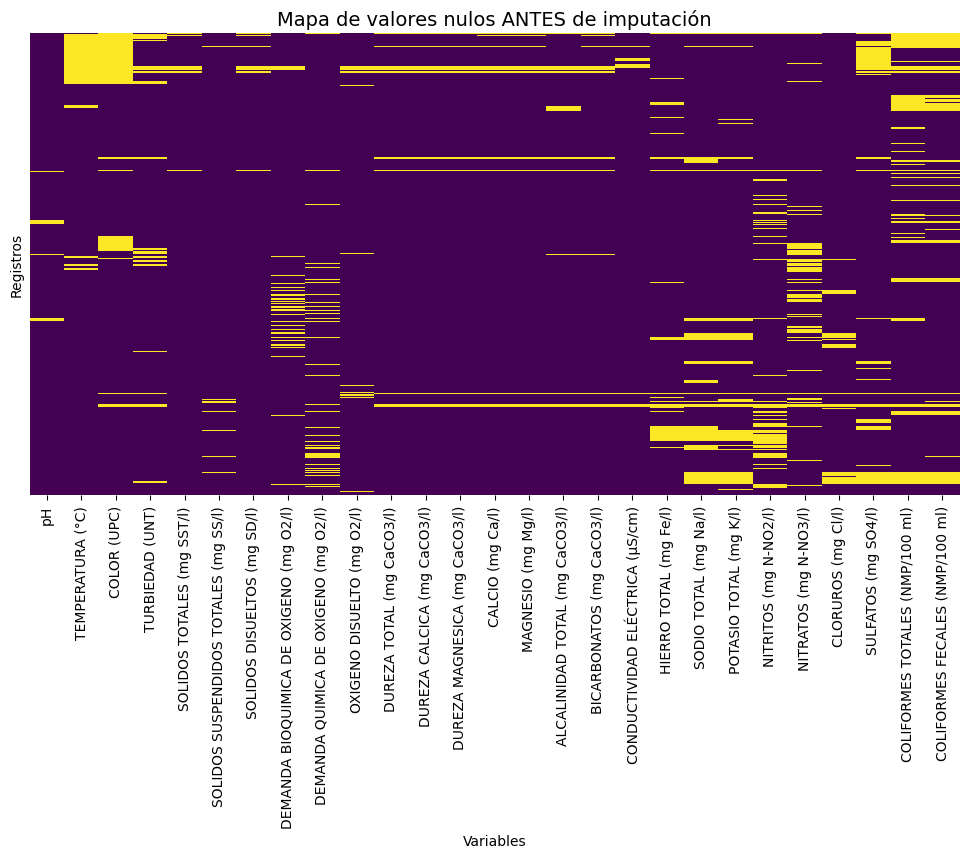

In [21]:
# --- Análisis de valores nulos ANTES de imputación ---

# 1) Conteo de nulos por variable
null_counts = df_filtrado.isnull().sum()
null_percent = (null_counts / len(df_filtrado)) * 100

# 2) Tabla resumen
tabla_nulos = pd.DataFrame({
    "Nulos": null_counts,
    "% Nulos": null_percent
}).sort_values(by="% Nulos", ascending=False)

# 3) Visualización gráfica (heatmap de nulos antes de imputación)
plt.figure(figsize=(12, 6))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de valores nulos ANTES de imputación", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Registros")
plt.show()

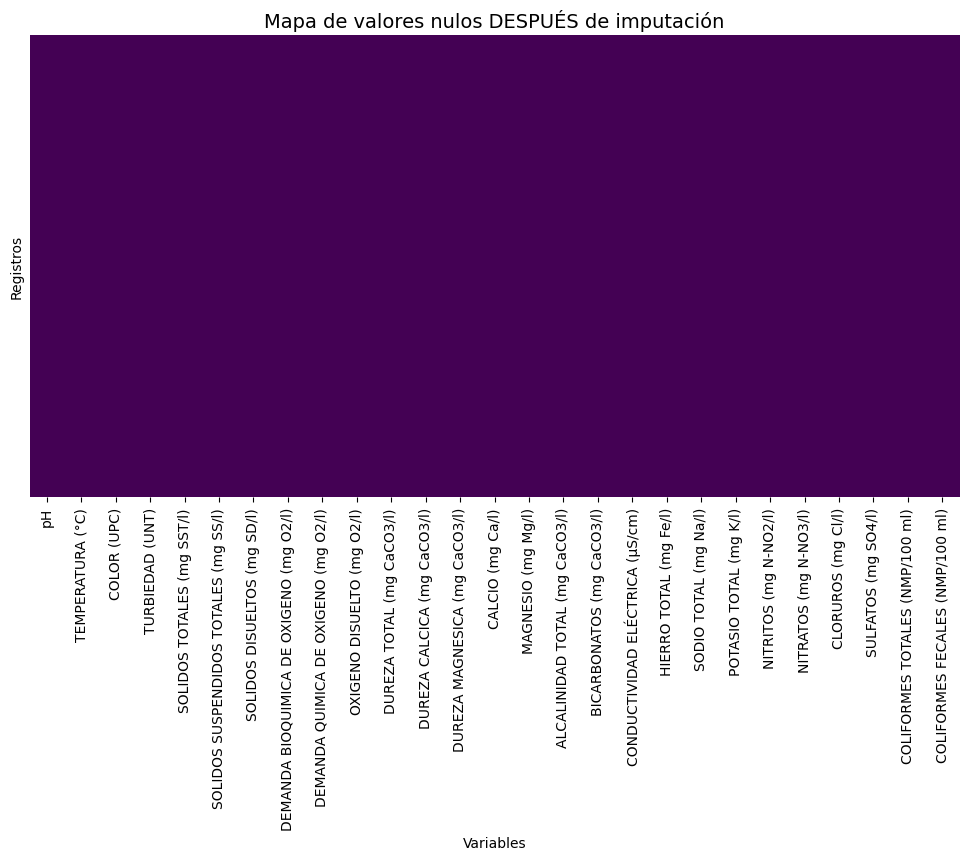

In [22]:
# 1. Escalar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_filtrado),
    columns=df_filtrado.columns
)

# 2. Imputar con KNN
imputer = KNNImputer(n_neighbors=5, weights="distance")
df_imputed_scaled = pd.DataFrame(
    imputer.fit_transform(df_scaled),
    columns=df_scaled.columns
)

# 3. Desescalar (volver a la escala original)
df_imputed = pd.DataFrame(
    scaler.inverse_transform(df_imputed_scaled),
    columns=df_filtrado.columns
)

# 4. Visualizar el resultado (valores nulos después de imputación)
plt.figure(figsize=(12, 6))
sns.heatmap(df_imputed.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de valores nulos DESPUÉS de imputación", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Registros")
plt.show()

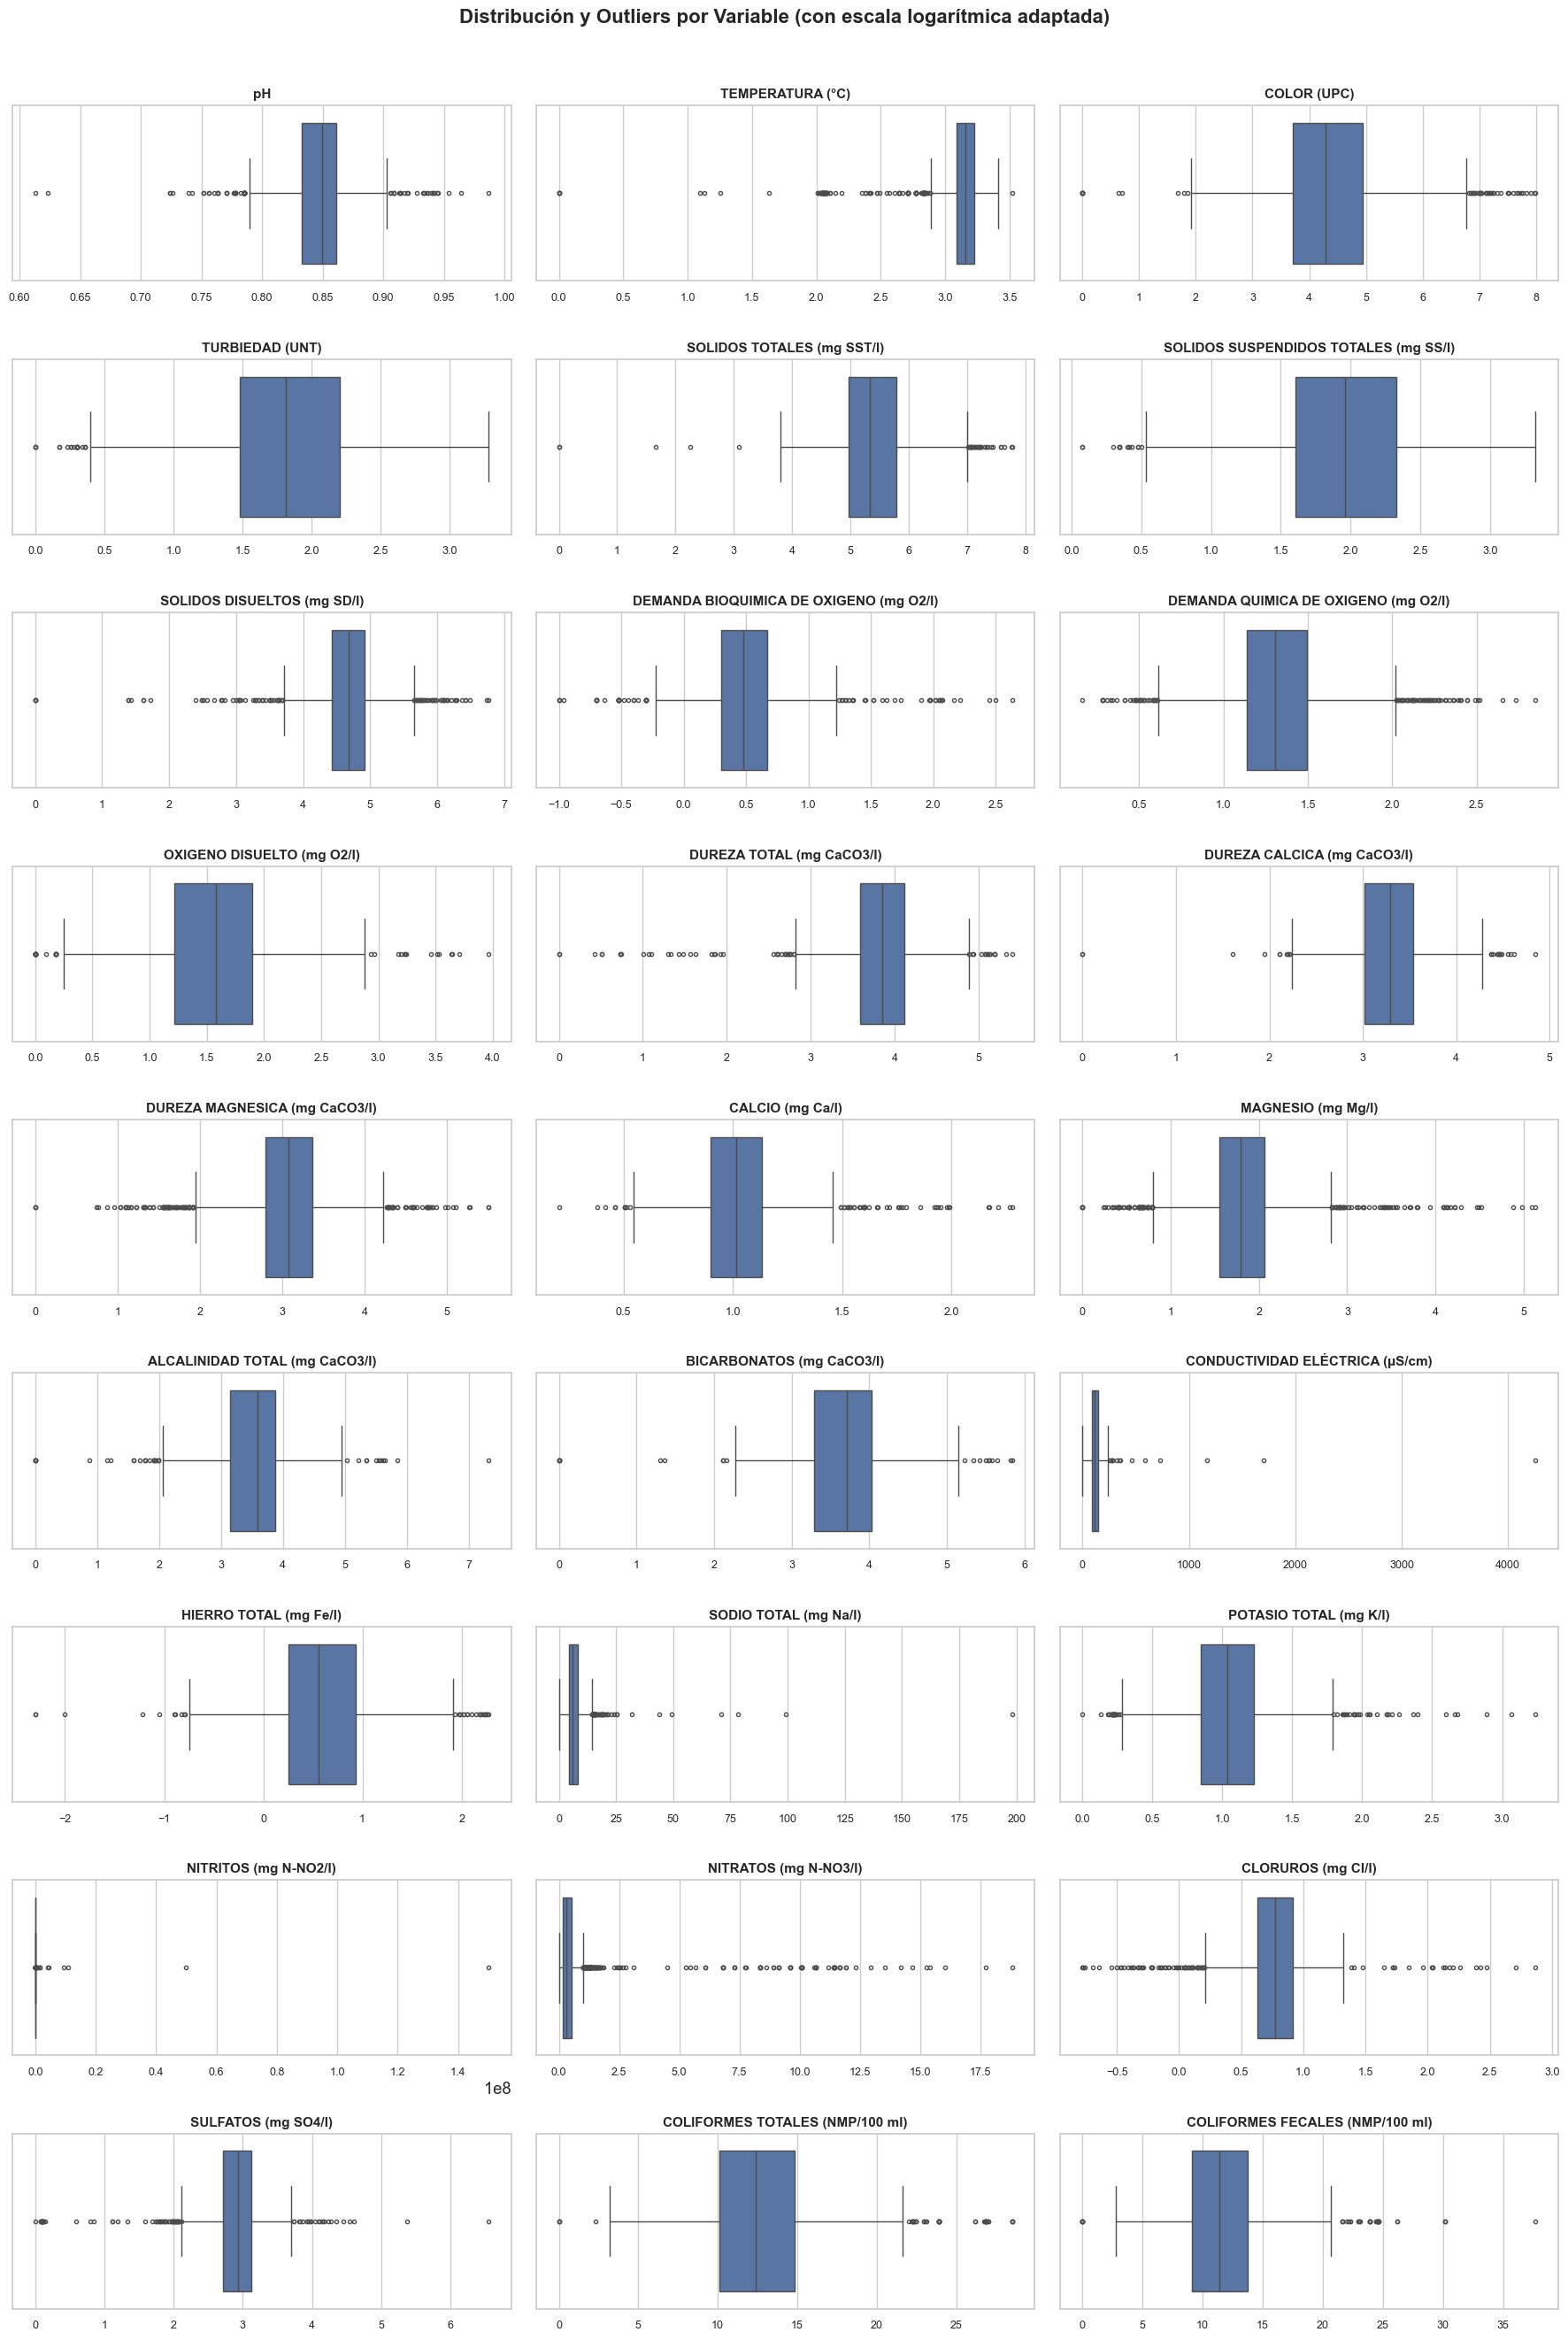

In [23]:
# Estilo gráfico
sns.set_theme(style="whitegrid", font_scale=1.2)

# Copia segura de la base imputada
df_box = df_imputed.copy()

# Función: aplicar logaritmo solo si es seguro
def log_transform_safe(series):
    s = pd.to_numeric(series, errors="coerce")
    if (s > 0).all():
        return np.log10(s)          # log base 10 si todos > 0
    elif (s >= 0).all():
        return np.log1p(s)          # log(1+x) si todos >= 0
    else:
        return s                    # si hay negativos, no se transforma

# Aplicar la transformación log segura a cada columna
df_box = df_box.apply(log_transform_safe)

# Configuración de subplots
num_vars = len(df_box.columns)
num_cols = 3
num_rows = int(np.ceil(num_vars / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 3))
axes = axes.flatten()

# Crear un boxplot por variable
for i, col in enumerate(df_box.columns):
    sns.boxplot(
        x=df_box[col],
        ax=axes[i],
        color="#4C72B0",
        fliersize=3,    # tamaño de puntos atípicos
        linewidth=1
    )
    axes[i].set_title(col, fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='x', labelsize=9)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
fig.suptitle(
    "Distribución y Outliers por Variable (con escala logarítmica adaptada)",
    fontsize=16, fontweight="bold"
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [24]:
ols_prob = ['NITRITOS (mg N-NO2/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)']

diag = []
for c in ols_prob:
    s = pd.to_numeric(df_imputed[c], errors='coerce').dropna()

    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((s < q1 - 1.5*iqr) | (s > q3 + 1.5*iqr))

    diag.append({
        'col': c,
        'n': s.size,
        'zeros_%': (s.eq(0).mean() * 100).round(2),
        'min': s.min(),
        'q1': q1, 
        'median': s.median(), 
        'q3': q3, 
        'max': s.max(),
        'skew': s.skew(), 
        'kurt': s.kurt(),
        'outliers(n)': int(outliers.sum()),
        'outliers_%': (outliers.mean() * 100).round(2)
    })

pd.DataFrame(diag)

col     n  zeros_%           min     q1  \
0            NITRITOS (mg N-NO2/l)  2254      0.0 -1.455192e-11   0.01   
1  CONDUCTIVIDAD ELÉCTRICA (µS/cm)  2254      0.0 -1.421085e-14  87.50   

     median         q3          max       skew         kurt  outliers(n)  \
0    0.0251    0.08885  150000000.0  41.428283  1810.841234          446   
1  117.0000  151.00000       4259.0  28.374031  1052.214221           14   

   outliers_%  
0       19.79  
1        0.62

In [25]:
# Top 10 valores más altos para revisar posibles errores/unidades
cols_prob = ['NITRITOS (mg N-NO2/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)']

for c in cols_prob:
    print(f"\nTop 10 valores de {c}:")
    top_vals = (
        df_imputed[[c]]
        .reset_index(names="idx")   # mostrar índice original como columna
        .sort_values(c, ascending=False)
        .head(10)
    )
    display(top_vals)


Top 10 valores de NITRITOS (mg N-NO2/l):


idx  NITRITOS (mg N-NO2/l)
2166  2166            150000000.0
2174  2174             50000000.0
2171  2171             11000000.0
2172  2172              9300000.0
2168  2168              4600000.0
2175  2175              4300000.0
2180  2180              1500000.0
2165  2165              1500000.0
2186  2186               930000.0
2164  2164               430000.0


Top 10 valores de CONDUCTIVIDAD ELÉCTRICA (µS/cm):


idx  CONDUCTIVIDAD ELÉCTRICA (µS/cm)
1078  1078                           4259.0
1885  1885                           1706.0
649    649                           1172.0
374    374                            727.2
1887  1887                            589.0
1437  1437                            467.0
744    744                            354.0
342    342                            343.4
46      46                            319.5
561    561                            283.9

In [26]:
def transform_robusta_para_plot(s: pd.Series, p_low=0.005, p_high=0.995):

    s = pd.to_numeric(s, errors='coerce').dropna()

    # epsilon = mitad del mínimo positivo para permitir log(0)
    min_pos = s[s > 0].min()
    eps = min_pos/2 if pd.notna(min_pos) and min_pos > 0 else 1e-12

    # Transformación según el rango
    if (s >= 0).all():
        s = np.log10(s + eps)
    else:
        med = s.median()
        iqr = (s.quantile(0.75) - s.quantile(0.25)) or 1.0
        s = (s - med) / iqr

    # Winsorización para limitar outliers extremos
    lo, hi = s.quantile(p_low), s.quantile(p_high)
    return s.clip(lo, hi)


# Copia para graficar con variables transformadas
df_plot = df_imputed.copy()
for c in cols_prob:
    df_plot[c] = transform_robusta_para_plot(df_imputed[c])


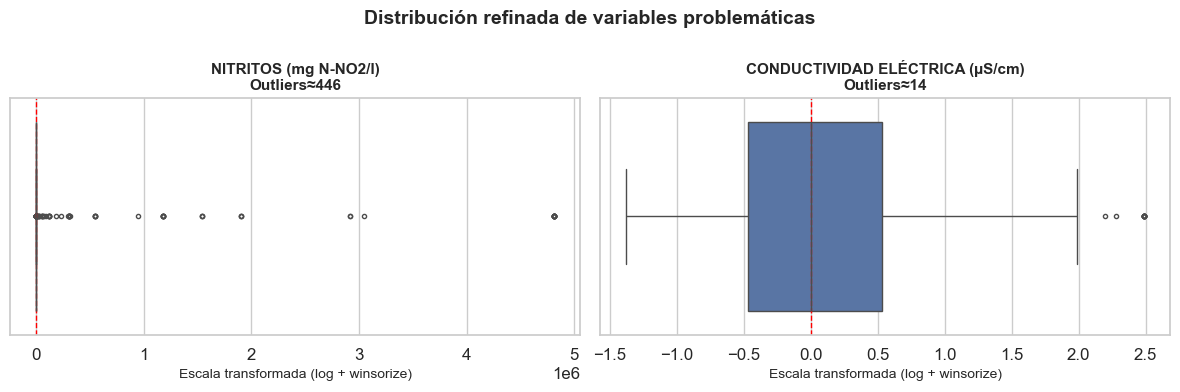

In [27]:
sns.set_theme(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col in zip(axes, cols_prob):
    sns.boxplot(
        x=df_plot[col], 
        ax=ax, 
        color="#4C72B0", 
        fliersize=3, 
        linewidth=1
    )
    # Línea en la mediana
    ax.axvline(df_plot[col].median(), ls="--", color="red", lw=1)
    
    # Contar outliers extremos (en escala transformada)
    q1, q3 = df_plot[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = ((df_plot[col] < q1 - 1.5*iqr) | (df_plot[col] > q3 + 1.5*iqr)).sum()

    ax.set_title(f"{col}\nOutliers≈{outliers}", fontsize=11, fontweight="bold")
    ax.set_xlabel("Escala transformada (log + winsorize)", fontsize=10)
    ax.set_ylabel("")

fig.suptitle("Distribución refinada de variables problemáticas", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


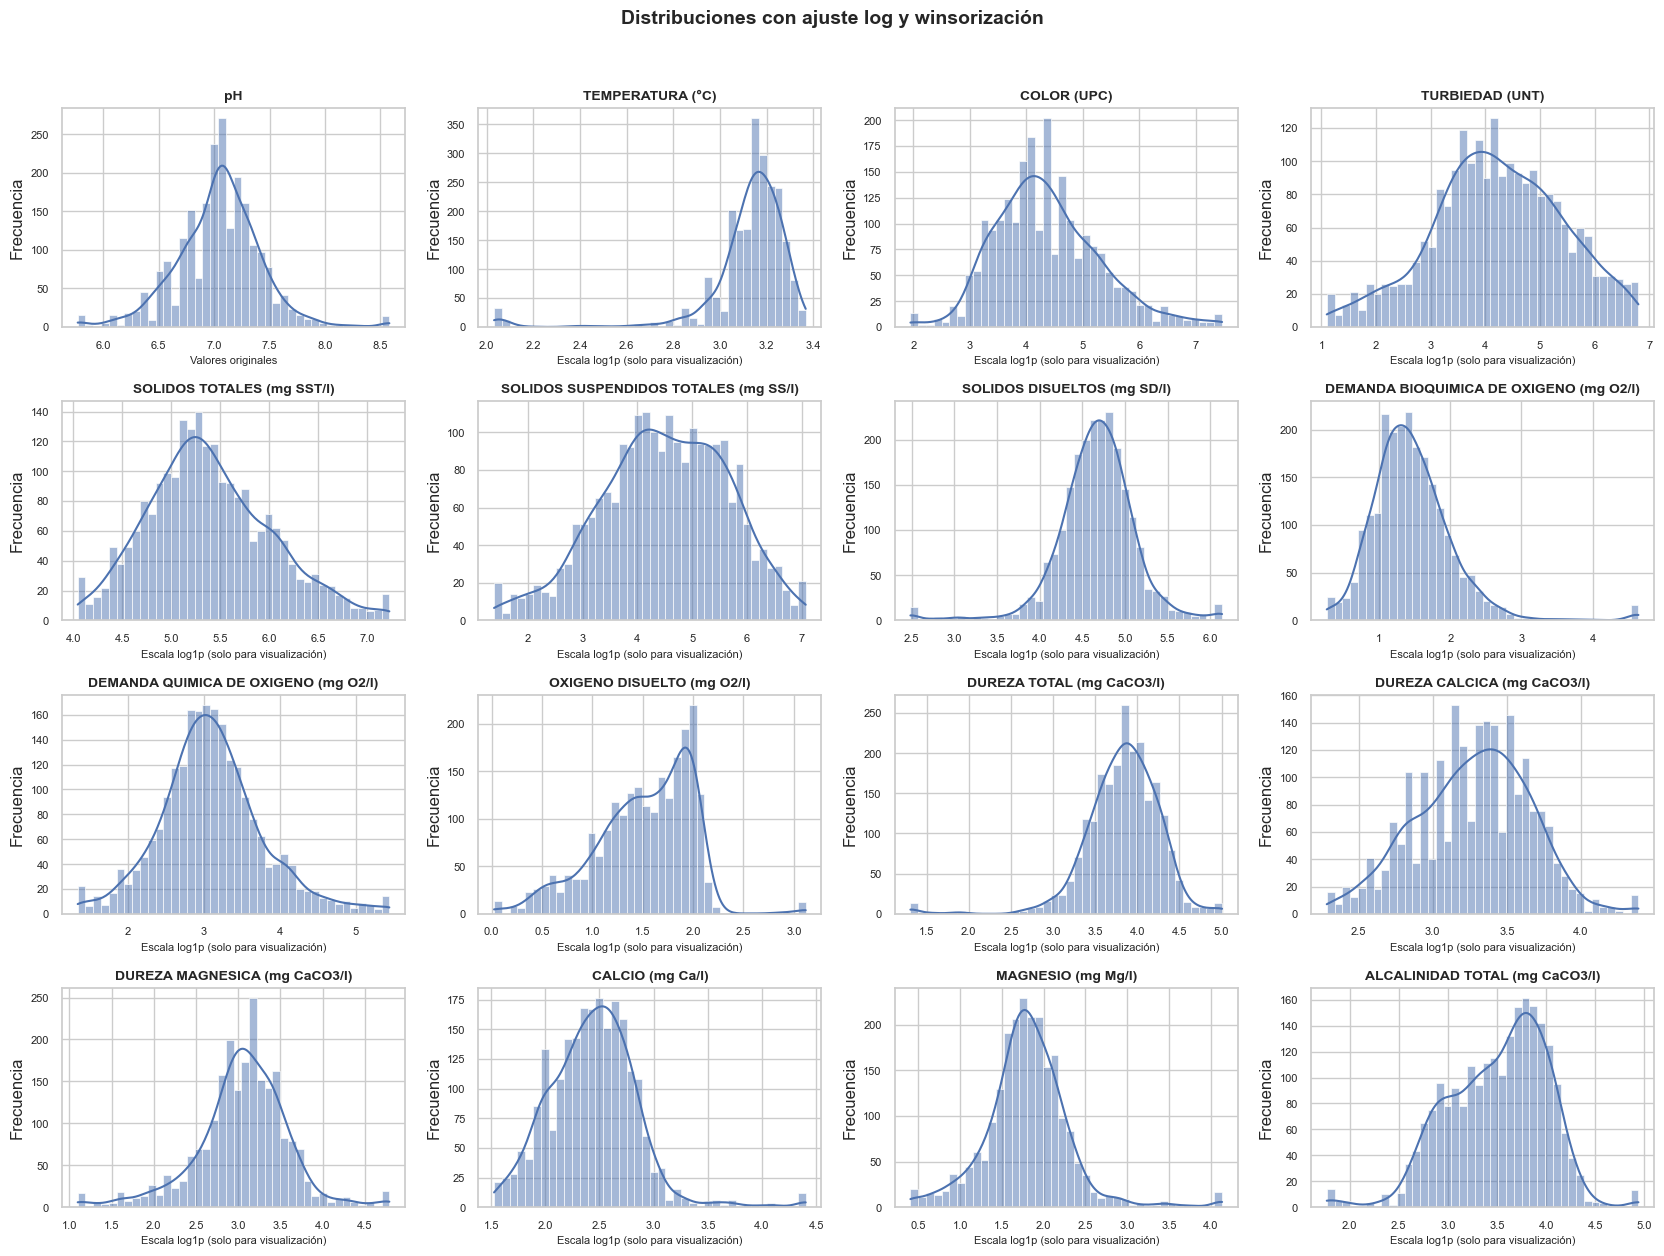

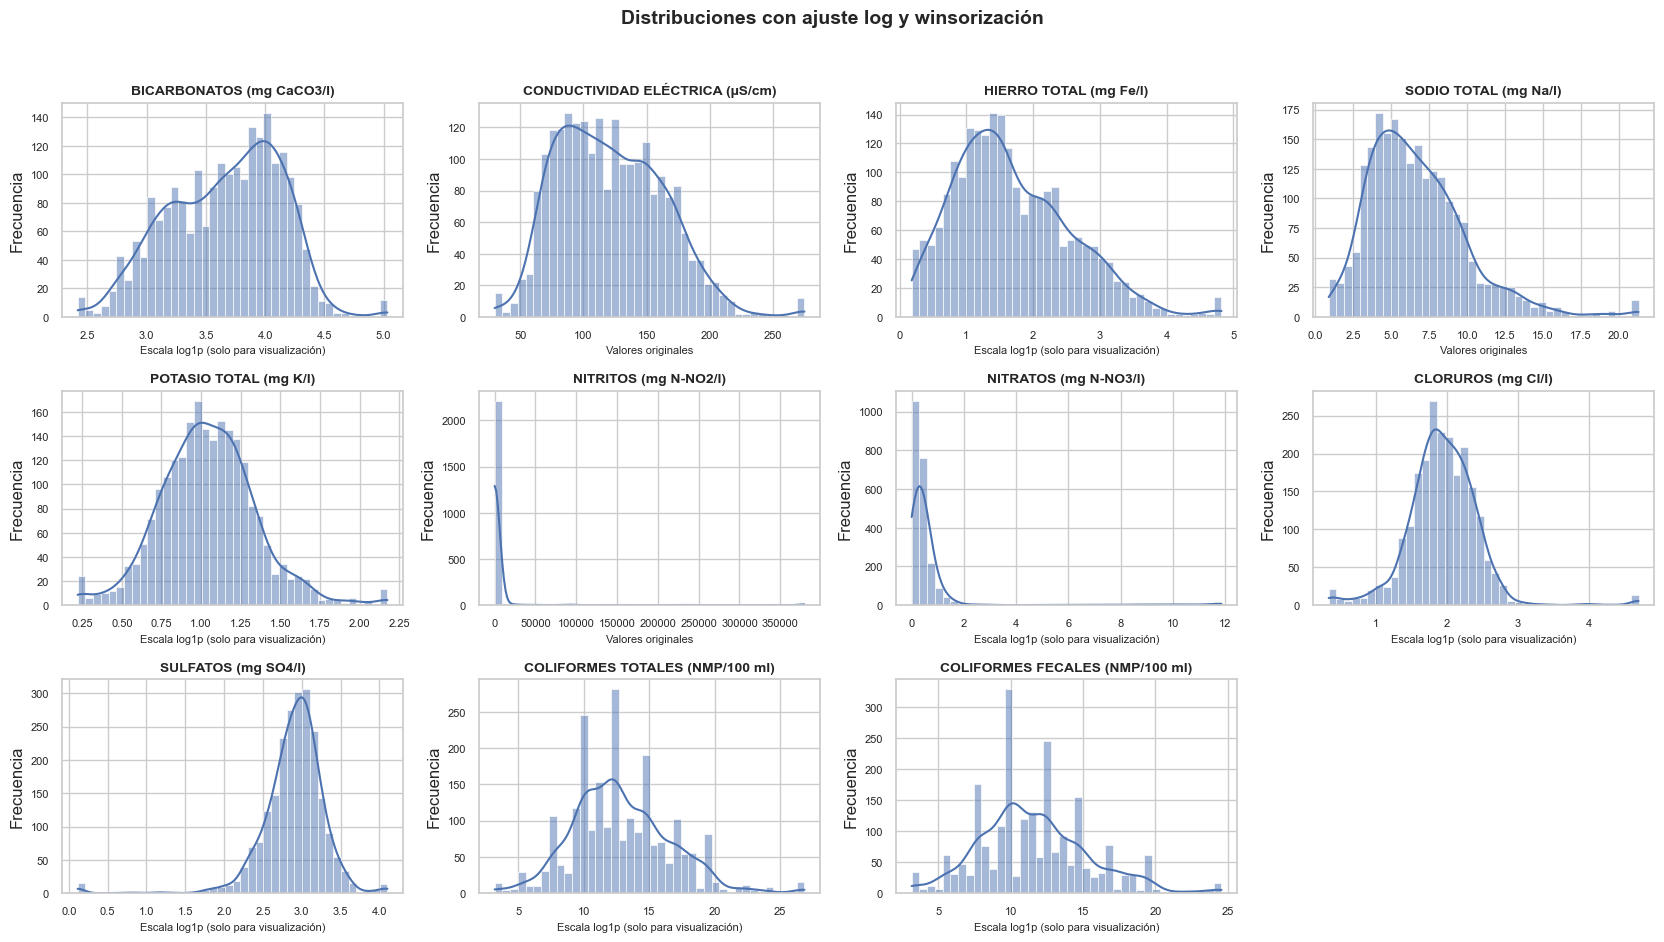

In [28]:
sns.set_theme(style="whitegrid")

# utilidad: decidir si conviene log
def needs_log(series, skew_thr=1.0):
    s = pd.to_numeric(series, errors='coerce').dropna()
    return (s.min() >= 0) and (abs(s.skew()) > skew_thr)

# utilidad: preparar para graficar
def prep_for_plot(series, winsor=(0.005, 0.995), bins=40):
    s = pd.to_numeric(series, errors='coerce').dropna()
    if needs_log(s):
        s = np.log1p(s)   # log(1+x), estable para 0+
        xlab = "Escala log1p (solo para visualización)"
    else:
        xlab = "Valores originales"
    lo, hi = s.quantile(winsor[0]), s.quantile(winsor[1])
    s = s.clip(lo, hi)
    return s, xlab

# columnas numéricas válidas
num_cols = df_imputed.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if df_imputed[c].notna().any()]

# parámetros de layout
COLS = 4
BINS = 40
PAGE = COLS * 4
H, W = 3.2, 4.2

# loop por páginas
for start in range(0, len(num_cols), PAGE):
    subset = num_cols[start:start+PAGE]
    rows = int(np.ceil(len(subset) / COLS))
    fig, axes = plt.subplots(rows, COLS, figsize=(W*COLS, H*rows))
    axes = np.array(axes).reshape(-1)

    for ax, col in zip(axes, subset):
        s_plot, xlab = prep_for_plot(df_imputed[col], winsor=(0.005, 0.995), bins=BINS)
        sns.histplot(s_plot, bins=BINS, kde=(len(s_plot) > 50), ax=ax, color="#4C72B0")
        ax.set_title(col, fontsize=10, fontweight="bold")
        ax.set_xlabel(xlab, fontsize=8)
        ax.set_ylabel("Frecuencia")
        ax.tick_params(axis='both', labelsize=8)

    # limpiar ejes vacíos
    for ax in axes[len(subset):]:
        ax.remove()

    fig.suptitle("Distribuciones con ajuste log y winsorización", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# CORRELACIONES (excluyendo objetivos)

Columnas usadas para correlación entre predictores: 25
Objetivos excluidos del mapa entre predictores: ['DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)', 'pH']

Pares altamente correlacionados (Pearson):


Variable_1                             Variable_2  \
285          NITRITOS (mg N-NO2/l)                  NITRATOS (mg N-NO3/l)   
69      SOLIDOS TOTALES (mg SST/l)  SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)   
209               CALCIO (mg Ca/l)                     MAGNESIO (mg Mg/l)   
196  DUREZA MAGNESICA (mg CaCO3/l)                     MAGNESIO (mg Mg/l)   

     Correlacion  
285     0.999167  
69      0.945886  
209     0.889820  
196     0.862277


Pares altamente correlacionados (Spearman):


Variable_1                             Variable_2  \
196    DUREZA MAGNESICA (mg CaCO3/l)                     MAGNESIO (mg Mg/l)   
181      DUREZA CALCICA (mg CaCO3/l)                       CALCIO (mg Ca/l)   
234   ALCALINIDAD TOTAL (mg CaCO3/l)              BICARBONATOS (mg CaCO3/l)   
299  COLIFORMES TOTALES (NMP/100 ml)        COLIFORMES FECALES (NMP/100 ml)   
69        SOLIDOS TOTALES (mg SST/l)  SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)   
164        DUREZA TOTAL (mg CaCO3/l)            DUREZA CALCICA (mg CaCO3/l)   
165        DUREZA TOTAL (mg CaCO3/l)          DUREZA MAGNESICA (mg CaCO3/l)   

     Correlacion  
196     0.989248  
181     0.959695  
234     0.933178  
299     0.890696  
69      0.863731  
164     0.817818  
165     0.804018

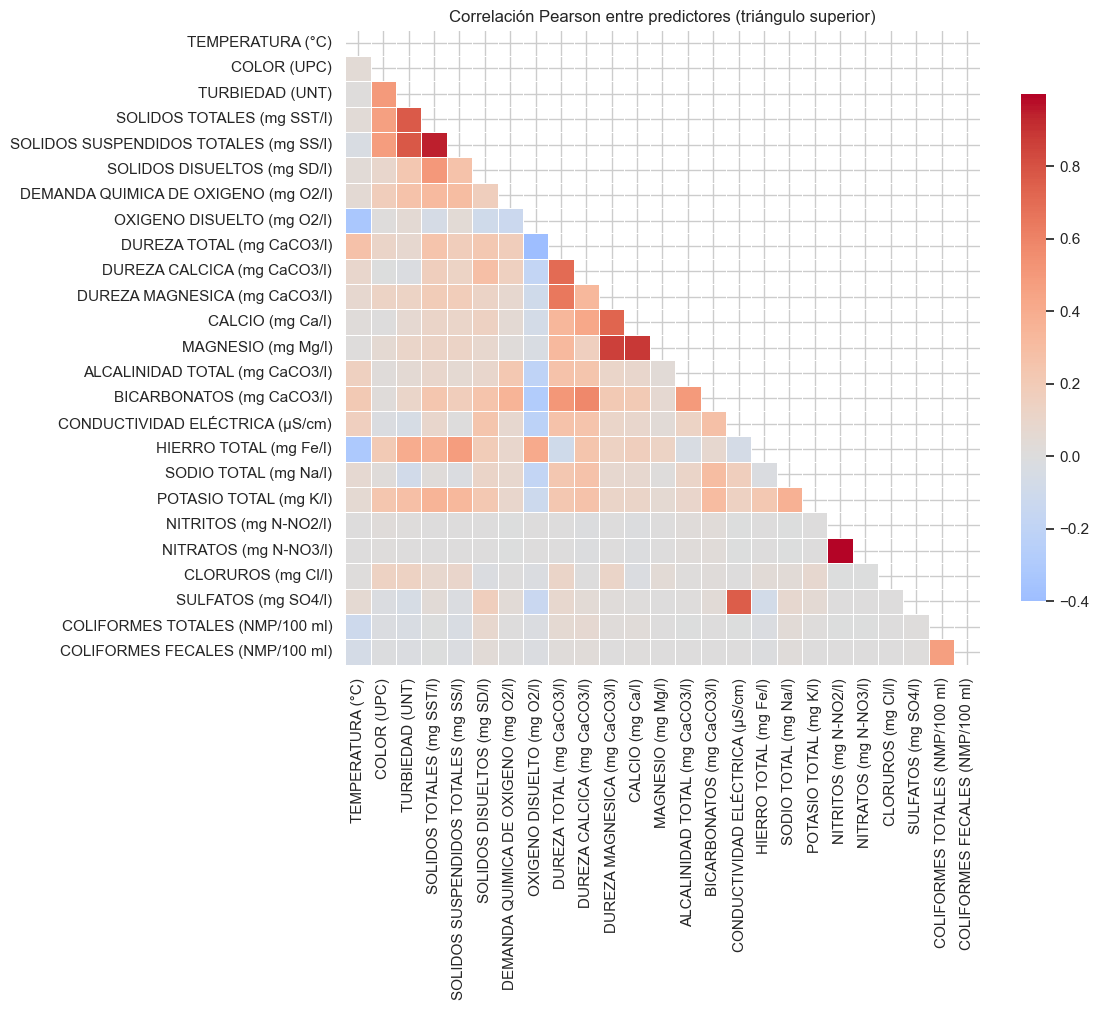

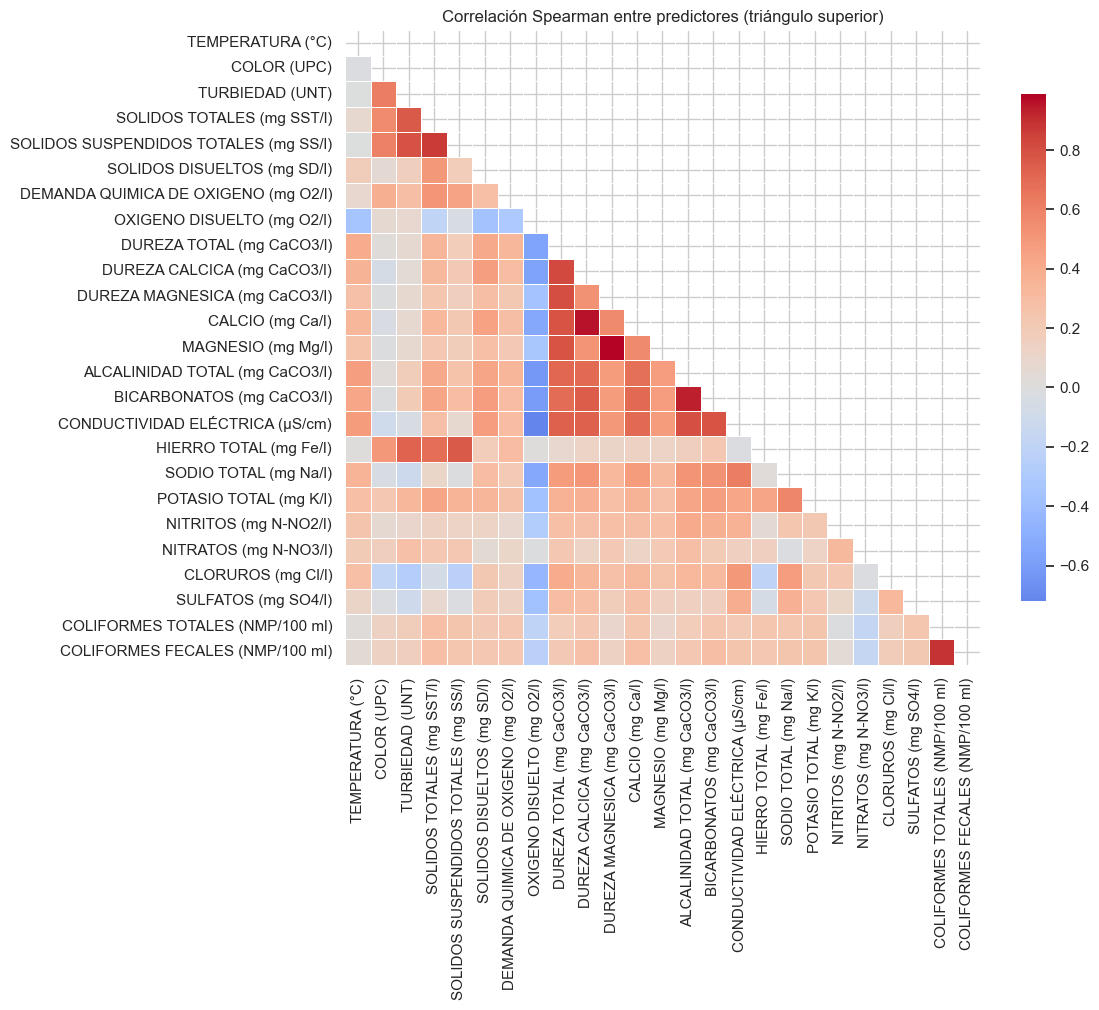


Correlación Spearman de predictores con el objetivo: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)


Spearman_vs_objetivo
BICARBONATOS (mg CaCO3/l)                          0.526899
CONDUCTIVIDAD ELÉCTRICA (µS/cm)                    0.500682
ALCALINIDAD TOTAL (mg CaCO3/l)                     0.488444
CALCIO (mg Ca/l)                                   0.460828
DUREZA CALCICA (mg CaCO3/l)                        0.458406
SODIO TOTAL (mg Na/l)                              0.381278
DUREZA TOTAL (mg CaCO3/l)                          0.357546
COLIFORMES FECALES (NMP/100 ml)                    0.354755
POTASIO TOTAL (mg K/l)                             0.335980
DEMANDA QUIMICA DE OXIGENO (mg O2/l)               0.320140
COLIFORMES TOTALES (NMP/100 ml)                    0.319804
SOLIDOS DISUELTOS (mg SD/l)                        0.305377
SOLIDOS TOTALES (mg SST/l)                         0.300415
NITRITOS (mg N-NO2/l)                              0.290383
MAGNESIO (mg Mg/l)                                 0.281166
DUREZA MAGNESICA (mg CaCO3/l)                      0.273995
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)              0.246680
TEMPERATURA (°C)                                   0.239650
CLORUROS (mg Cl/l)                                 0.220268
HIERRO TOTAL (mg Fe/l)                             0.207312
SULFATOS (mg SO4/l)                                0.176245
TURBIEDAD (UNT)                                    0.154607
NITRATOS (mg N-NO3/l)                              0.081484
COLOR (UPC)                                        0.054881
OXIGENO DISUELTO (mg O2/l)                        -0.497489


Correlación Spearman de predictores con el objetivo: pH


Spearman_vs_objetivo
NITRATOS (mg N-NO3/l)                              0.306038
ALCALINIDAD TOTAL (mg CaCO3/l)                     0.285236
BICARBONATOS (mg CaCO3/l)                          0.243331
TEMPERATURA (°C)                                   0.235442
DUREZA CALCICA (mg CaCO3/l)                        0.172514
NITRITOS (mg N-NO2/l)                              0.170256
CALCIO (mg Ca/l)                                   0.164018
CONDUCTIVIDAD ELÉCTRICA (µS/cm)                    0.158347
DUREZA TOTAL (mg CaCO3/l)                          0.153381
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)              0.107343
DUREZA MAGNESICA (mg CaCO3/l)                      0.098545
MAGNESIO (mg Mg/l)                                 0.094437
SOLIDOS TOTALES (mg SST/l)                         0.089851
TURBIEDAD (UNT)                                    0.079100
COLOR (UPC)                                        0.036896
OXIGENO DISUELTO (mg O2/l)                         0.030051
SODIO TOTAL (mg Na/l)                              0.027339
DEMANDA QUIMICA DE OXIGENO (mg O2/l)               0.008562
SOLIDOS DISUELTOS (mg SD/l)                        0.003770
HIERRO TOTAL (mg Fe/l)                             0.001060
POTASIO TOTAL (mg K/l)                            -0.042816
CLORUROS (mg Cl/l)                                -0.055488
COLIFORMES FECALES (NMP/100 ml)                   -0.069841
COLIFORMES TOTALES (NMP/100 ml)                   -0.093693
SULFATOS (mg SO4/l)                               -0.148100

In [29]:
# Requisitos: df_imputed ya creado; 'objetivos' definido (1 o 2 nombres exactos en df_imputed)

# Preparar base numérica y limpiar
df_num = df_imputed.select_dtypes(include='number').copy()
df_num = df_num.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')

# Quitar columnas constantes
var0 = df_num.nunique(dropna=True) <= 1
if var0.any():
    df_num = df_num.loc[:, ~var0]

# Excluir objetivos del bloque de correlación entre predictores
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in df_num.columns]
pred_cols = [c for c in df_num.columns if c not in objetivos_presentes]

print(f"Columnas usadas para correlación entre predictores: {len(pred_cols)}")
if objetivos_presentes:
    print("Objetivos excluidos del mapa entre predictores:", objetivos_presentes)

assert len(pred_cols) > 1, "No hay columnas numéricas válidas para correlación entre predictores."

# Correlaciones entre predictores (Pearson y Spearman)
corr_p = df_num[pred_cols].corr(method='pearson')
corr_s = df_num[pred_cols].corr(method='spearman')

# Función para extraer pares fuertes (sin duplicados)
def pares_fuertes(corr, umbral=0.8):
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    corr_u = corr.where(mask)
    out = (
        corr_u.stack()
        .rename("Correlacion")
        .reset_index()
        .rename(columns={"level_0": "Variable_1", "level_1": "Variable_2"})
        .assign(abs_val=lambda d: d["Correlacion"].abs())
        .query("abs_val >= @umbral")
        .sort_values("abs_val", ascending=False)
        .drop(columns="abs_val")
    )
    return out

pares_pearson  = pares_fuertes(corr_p, umbral=0.8)
pares_spearman = pares_fuertes(corr_s, umbral=0.8)

print("\nPares altamente correlacionados (Pearson):")
display(pares_pearson.head(20))
print("\nPares altamente correlacionados (Spearman):")
display(pares_spearman.head(20))

# Heatmaps (triángulo superior)
def heatmap_corr(corr, title):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr, mask=mask, cmap="coolwarm", center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .8}
    )
    plt.title(title)
    plt.tight_layout()
    plt.show()

heatmap_corr(corr_p, "Correlación Pearson entre predictores (triángulo superior)")
heatmap_corr(corr_s, "Correlación Spearman entre predictores (triángulo superior)")

# (Extra útil) Correlación de CADA objetivo vs. predictores
if objetivos_presentes:
    for obj in objetivos_presentes:
        # solo columnas que coexisten con el objetivo sin NaN simultáneo
        sub = df_num[pred_cols + [obj]].dropna(subset=[obj])
        corr_obj = sub.corr(method='spearman')[obj].drop(labels=[obj]).sort_values(ascending=False)
        print(f"\nCorrelación Spearman de predictores con el objetivo: {obj}")
        display(corr_obj.to_frame(name="Spearman_vs_objetivo"))


# FILTRO POR COLINEALIDAD (Spearman)

In [30]:
# Usa corr_s (entre predictores) ya calculado
UMBRAL = 0.85  # ajusta a gusto (0.8-0.9 suele ser razonable)

corr_abs = corr_s.abs()
mask_sup = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
pairs = (
    corr_abs.where(mask_sup)
    .stack()
    .rename("rho")
    .reset_index()
    .rename(columns={"level_0": "A", "level_1": "B"})
    .query("rho >= @UMBRAL")
    .sort_values("rho", ascending=False)
)

print(f"Pares con |Spearman| ≥ {UMBRAL}: {len(pairs)}")
display(pairs.head(20))

# ===== Heurística mejorada para decidir a quién eliminar =====
# 1) Preferir la variable con MAYOR |corr| respecto al/los objetivo(s) seleccionados.
# 2) Si no hay objetivos (o empate), usar el mayor promedio de |corr| con las demás (tu fallback).

# Objetivos presentes en df_num (si definiste 'objetivos' antes)
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in df_imputed.columns]

# Construir score por variable basado en relación con objetivos
target_score = {}
if objetivos_presentes:
    # Spearman entre TODOS los numéricos y cada objetivo (en abs) y tomamos el máximo por variable
    for var in df_num.columns:
        if var in objetivos_presentes:
            continue
        cors = []
        for obj in objetivos_presentes:
            sub = df_imputed[[var, obj]].dropna()
            if sub.shape[0] > 2:
                cors.append(sub.corr(method='spearman').iloc[0, 1])
        target_score[var] = np.max(np.abs(cors)) if cors else 0.0
else:
    # si no hay objetivos, score = 0 (se usará el fallback)
    target_score = {var: 0.0 for var in df_num.columns}

# Fallback: correlación media absoluta con el resto (tu criterio original)
mean_abs_corr = corr_abs.mean().to_dict()

eliminar, conservar = set(), set()

for _, row in pairs.iterrows():
    a, b = row["A"], row["B"]
    # si ya se decidió algo por pares anteriores, saltar
    if a in eliminar or b in eliminar:
        continue

    # nunca eliminar objetivos (por seguridad, aunque aquí no deberían estar)
    if a in objetivos_presentes:
        conservar.add(a); eliminar.add(b); continue
    if b in objetivos_presentes:
        conservar.add(b); eliminar.add(a); continue

    # 1) usar score con objetivos
    ta, tb = target_score.get(a, 0.0), target_score.get(b, 0.0)

    if not np.isclose(ta, tb):
        keep, drop = (a, b) if ta > tb else (b, a)
    else:
        # 2) empate o sin objetivos -> usar promedio de |corr|
        ma, mb = mean_abs_corr.get(a, 0.0), mean_abs_corr.get(b, 0.0)
        keep, drop = (a, b) if ma >= mb else (b, a)

    conservar.add(keep)
    eliminar.add(drop)

eliminar = sorted(eliminar)
print(f"\nVariables a eliminar por alta colinealidad (heurística objetivo→fallback):")
print(eliminar)

# DataFrame filtrado por correlación (listo para VIF / feature selection)
df_corr_filtered = df_num.drop(columns=eliminar, errors='ignore')

print(f"\nShape original (numérico): {df_num.shape}")
print(f"Shape tras filtrar por correlación: {df_corr_filtered.shape}")

# ver resumen de lo conservado
conservadas = list(df_corr_filtered.columns)
print(f"\nVariables conservadas ({len(conservadas)}):")
conservadas

Pares con |Spearman| ≥ 0.85: 5


A                                      B  \
196    DUREZA MAGNESICA (mg CaCO3/l)                     MAGNESIO (mg Mg/l)   
181      DUREZA CALCICA (mg CaCO3/l)                       CALCIO (mg Ca/l)   
234   ALCALINIDAD TOTAL (mg CaCO3/l)              BICARBONATOS (mg CaCO3/l)   
299  COLIFORMES TOTALES (NMP/100 ml)        COLIFORMES FECALES (NMP/100 ml)   
69        SOLIDOS TOTALES (mg SST/l)  SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)   

          rho  
196  0.989248  
181  0.959695  
234  0.933178  
299  0.890696  
69   0.863731


Variables a eliminar por alta colinealidad (heurística objetivo→fallback):
['ALCALINIDAD TOTAL (mg CaCO3/l)', 'COLIFORMES TOTALES (NMP/100 ml)', 'DUREZA CALCICA (mg CaCO3/l)', 'DUREZA MAGNESICA (mg CaCO3/l)', 'SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)']

Shape original (numérico): (2254, 27)
Shape tras filtrar por correlación: (2254, 22)

Variables conservadas (22):


['pH',
 'TEMPERATURA (°C)',
 'COLOR (UPC)',
 'TURBIEDAD (UNT)',
 'SOLIDOS TOTALES (mg SST/l)',
 'SOLIDOS DISUELTOS (mg SD/l)',
 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)',
 'DEMANDA QUIMICA DE OXIGENO (mg O2/l)',
 'OXIGENO DISUELTO (mg O2/l)',
 'DUREZA TOTAL (mg CaCO3/l)',
 'CALCIO (mg Ca/l)',
 'MAGNESIO (mg Mg/l)',
 'BICARBONATOS (mg CaCO3/l)',
 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)',
 'HIERRO TOTAL (mg Fe/l)',
 'SODIO TOTAL (mg Na/l)',
 'POTASIO TOTAL (mg K/l)',
 'NITRITOS (mg N-NO2/l)',
 'NITRATOS (mg N-NO3/l)',
 'CLORUROS (mg Cl/l)',
 'SULFATOS (mg SO4/l)',
 'COLIFORMES FECALES (NMP/100 ml)']

# VIF iterativo

In [31]:
# df_corr_filtered: viene del paso anterior (filtrado por correlación)
X0 = df_corr_filtered.copy()

# Por seguridad, quitar filas con NaN residuales
X0 = X0.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# Objetivos a proteger (no deben eliminarse nunca)
objetivos_presentes = [o for o in (objetivos if 'objetivos' in globals() else []) if o in X0.columns]

def calc_vif(dfX: pd.DataFrame) -> pd.DataFrame:
    """Calcula VIF para todas las columnas de dfX."""
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    Xmat = dfX.values
    vif_vals = [variance_inflation_factor(Xmat, i) for i in range(Xmat.shape[1])]
    return pd.DataFrame({"feature": dfX.columns, "VIF": vif_vals}).sort_values("VIF", ascending=False)

UMBRAL_VIF = 10.0
removed = []
vif_historial = []

X = X0.copy()

while True:
    vif_df = calc_vif(X)
    vif_historial.append(vif_df.assign(iter=len(vif_historial)+1))

    # variable con VIF máximo
    idx_max = vif_df["VIF"].idxmax()
    feat_max = vif_df.loc[idx_max, "feature"]
    max_vif = vif_df.loc[idx_max, "VIF"]

    print(f"Iteración {len(vif_historial)} | Máx VIF = {max_vif:.2f} ({feat_max}) | n_vars = {X.shape[1]}")

    # condición de parada
    if (max_vif <= UMBRAL_VIF) or (X.shape[1] <= 2):
        break

    # NO eliminar objetivos
    if feat_max in objetivos_presentes:
        print(f"{feat_max} es objetivo, se conserva aunque tenga VIF alto.")
        break

    # eliminar la variable más colineal y repetir
    removed.append((feat_max, float(max_vif)))
    X = X.drop(columns=[feat_max])

# DataFrames de salida
vif_historial = pd.concat(vif_historial, ignore_index=True)
vif_final = calc_vif(X).reset_index(drop=True)
df_vif_filtered = X.copy()

print("\nVariables eliminadas por VIF > {:.1f}:".format(UMBRAL_VIF))
for f, v in removed:
    print(f"  - {f} (VIF={v:.2f})")

print("\nResumen:")
print(f"Shape inicial (post-correlación): {X0.shape}")
print(f"Shape final (post-VIF):           {df_vif_filtered.shape}")

print("\nVIF final (variables conservadas):")
display(vif_final)

Iteración 1 | Máx VIF = 616.90 (NITRITOS (mg N-NO2/l)) | n_vars = 22
Iteración 2 | Máx VIF = 5.86 (CALCIO (mg Ca/l)) | n_vars = 21

Variables eliminadas por VIF > 10.0:
  - NITRITOS (mg N-NO2/l) (VIF=616.90)

Resumen:
Shape inicial (post-correlación): (2254, 22)
Shape final (post-VIF):           (2254, 21)

VIF final (variables conservadas):


feature       VIF
0                          CALCIO (mg Ca/l)  5.855409
1                        MAGNESIO (mg Mg/l)  5.740587
2                SOLIDOS TOTALES (mg SST/l)  3.903843
3                           TURBIEDAD (UNT)  3.168682
4                    HIERRO TOTAL (mg Fe/l)  2.994304
5           CONDUCTIVIDAD ELÉCTRICA (µS/cm)  2.949222
6                       SULFATOS (mg SO4/l)  2.608597
7   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  2.223375
8                 BICARBONATOS (mg CaCO3/l)  1.979933
9                 DUREZA TOTAL (mg CaCO3/l)  1.911038
10               OXIGENO DISUELTO (mg O2/l)  1.590968
11              SOLIDOS DISUELTOS (mg SD/l)  1.564340
12                   POTASIO TOTAL (mg K/l)  1.458421
13                              COLOR (UPC)  1.436853
14                    SODIO TOTAL (mg Na/l)  1.308509
15     DEMANDA QUIMICA DE OXIGENO (mg O2/l)  1.268452
16                         TEMPERATURA (°C)  1.224073
17                       CLORUROS (mg Cl/l)  1.061917
18          COLIFORMES FECALES (NMP/100 ml)  1.009549
19                    NITRATOS (mg N-NO3/l)  1.002852
20                                       pH  0.202579

# Fase 3. Entrenamiento de Modelos de Regresión

In [32]:
# Helpers necesarios por RFE
import numpy as np
import pandas as pd

def get_feature_frame_base():
    if 'df_vif_filtered' in globals():              # tras VIF
        X0 = df_vif_filtered.copy()
    elif 'df_filtrado' in globals():                # tras filtro de completitud
        X0 = df_filtrado.copy()
    elif 'df_base' in globals():
        X0 = df_base.copy()
    else:
        X0 = df_imputed.select_dtypes(include='number').copy()
    X0 = X0.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')
    const = X0.nunique(dropna=True) <= 1
    if const.any():
        X0 = X0.loc[:, ~const]
    return X0

def build_X_y_for_target(y_col: str):
    assert 'df_imputed' in globals(), "df_imputed no está definido."
    assert y_col in df_imputed.columns, f"No encuentro '{y_col}' en df_imputed."
    X0 = get_feature_frame_base()
    if y_col in X0.columns:
        X0 = X0.drop(columns=[y_col])
    X = X0.select_dtypes(include='number').copy()
    y = df_imputed.loc[X.index, y_col].copy()
    mask = y.notna()
    X = X.loc[mask]; y = y.loc[mask]
    X, y = X.align(y, join='inner', axis=0)
    return X, y

# chequeo rápido
print("build_X_y_for_target disponible?:", 'build_X_y_for_target' in globals())

build_X_y_for_target disponible?: True


In [34]:
# RFE optimizado
import numpy as np, pandas as pd
from math import ceil, sqrt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def _get_active_Xy(y_col):
    X, y = build_X_y_for_target(y_col)
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')
    return X, y

def _preselect_topk_spearman(X, y, k=20):
    cor = X.apply(lambda c: c.corr(y, method="spearman")).abs().sort_values(ascending=False)
    keep = cor.index[:min(k, X.shape[1])]
    return X[keep].copy()

def rfe_seleccion_por_objetivo(y_col, k=None, usar_preselect=True, top_pre=20, step=2):
    X, y = _get_active_Xy(y_col)
    if usar_preselect and X.shape[1] > top_pre:
        X = _preselect_topk_spearman(X, y, k=top_pre)

    p = X.shape[1]
    k_final = min(p, max(5, int(sqrt(p))) if k is None else k)
    modelos = {
        "RFE-Linear": ("std", LinearRegression()),
        "RFE-Ridge":  ("std", Ridge(alpha=1.0)),
        "RFE-SVRlin": ("minmax", SVR(kernel="linear", C=2.0))
    }
    votos = {}
    for nombre, (escala, est) in modelos.items():
        if escala == "std":
            Xs = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)
        else:
            Xs = pd.DataFrame(MinMaxScaler().fit_transform(X), index=X.index, columns=X.columns)
        sel = RFE(estimator=est, n_features_to_select=k_final, step=step).fit(Xs, y)
        kept = X.columns[sel.support_]
        for f in kept:
            votos[f] = votos.get(f, 0) + 1

    votos_df = pd.DataFrame({"feature": list(votos.keys()), "votos": list(votos.values())}) \
                 .sort_values("votos", ascending=False).reset_index(drop=True)
    mayoria_umbral = ceil(len(modelos)/2)  # con 3 modelos, mayoría = 2
    seleccion_mayoria = votos_df.loc[votos_df["votos"] >= mayoria_umbral, "feature"].tolist()
    return {"tabla_votos": votos_df, "seleccion_mayoria": seleccion_mayoria, "k_final": k_final, "p_analizado": p}

# ejecutar RFE para los objetivos y construir una selección común que luego se unirá con Permuted
rfe_resultados = {}
for target in objetivos:  # objetivos = [DBO, pH] ya fijados
    rfe_resultados[target] = rfe_seleccion_por_objetivo(target, k=None, usar_preselect=True, top_pre=20, step=2)

if len(objetivos) == 2:
    a, b = objetivos
    rfe_comun = sorted(list(set(rfe_resultados[a]["seleccion_mayoria"]).intersection(rfe_resultados[b]["seleccion_mayoria"])))
    if len(rfe_comun) < 5:
        rfe_comun = sorted(list(set(rfe_resultados[a]["seleccion_mayoria"]).union(rfe_resultados[b]["seleccion_mayoria"])))
else:
    rfe_comun = rfe_resultados[objetivos[0]]["seleccion_mayoria"]

print("Selección RFE por objetivo:")
for t in objetivos:
    print(f" - {t}: {rfe_resultados[t]['seleccion_mayoria']}")
print("Selección RFE común (pH ∩ DBO, con fallback a unión si es corta):", rfe_comun)

Selección RFE por objetivo:
 - DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l): ['CALCIO (mg Ca/l)', 'HIERRO TOTAL (mg Fe/l)', 'TURBIEDAD (UNT)', 'SOLIDOS TOTALES (mg SST/l)', 'MAGNESIO (mg Mg/l)']
 - pH: ['BICARBONATOS (mg CaCO3/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'POTASIO TOTAL (mg K/l)', 'SULFATOS (mg SO4/l)', 'TEMPERATURA (°C)']
Selección RFE común (pH ∩ DBO, con fallback a unión si es corta): ['BICARBONATOS (mg CaCO3/l)', 'CALCIO (mg Ca/l)', 'CONDUCTIVIDAD ELÉCTRICA (µS/cm)', 'HIERRO TOTAL (mg Fe/l)', 'MAGNESIO (mg Mg/l)', 'POTASIO TOTAL (mg K/l)', 'SOLIDOS TOTALES (mg SST/l)', 'SULFATOS (mg SO4/l)', 'TEMPERATURA (°C)', 'TURBIEDAD (UNT)']


In [40]:
def tablas_rfe_sencillas(rfe_resultados, rfe_comun, top=None):
    tablas = {}
    for obj in objetivos:
        df = rfe_resultados[obj]["tabla_votos"].copy()
        sel = set(rfe_resultados[obj]["seleccion_mayoria"])
        out = (
            df.assign(Seleccion=lambda d: np.where(d["feature"].isin(sel), "Sí", "No"))
              .rename(columns={"feature": "Variable", "votos": "Votos"})
              .loc[:, ["Variable", "Votos", "Seleccion"]]
              .sort_values("Votos", ascending=False)
              .reset_index(drop=True)
        )
        if top is not None:
            out = out.head(top)
        print(f"\nTabla RFE — {obj}")
        display(out)
        tablas[obj] = out

    tabla_comun = pd.DataFrame({"Variable": rfe_comun}).reset_index(drop=True)
    print("\nSelección RFE común (pH ∩ DBO, con fallback a unión si fue corta)")
    display(tabla_comun)
    return {"por_objetivo": tablas, "comun": tabla_comun}

rfe_tablas = tablas_rfe_sencillas(rfe_resultados, rfe_comun, top=None)


Tabla RFE — DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)


Variable  Votos Seleccion
0                      CALCIO (mg Ca/l)      3        Sí
1                HIERRO TOTAL (mg Fe/l)      3        Sí
2                       TURBIEDAD (UNT)      2        Sí
3            SOLIDOS TOTALES (mg SST/l)      2        Sí
4                    MAGNESIO (mg Mg/l)      2        Sí
5  DEMANDA QUIMICA DE OXIGENO (mg O2/l)      1        No
6            OXIGENO DISUELTO (mg O2/l)      1        No
7             BICARBONATOS (mg CaCO3/l)      1        No


Tabla RFE — pH


Variable  Votos Seleccion
0        BICARBONATOS (mg CaCO3/l)      3        Sí
1  CONDUCTIVIDAD ELÉCTRICA (µS/cm)      3        Sí
2           POTASIO TOTAL (mg K/l)      3        Sí
3              SULFATOS (mg SO4/l)      3        Sí
4                 TEMPERATURA (°C)      2        Sí
5                      COLOR (UPC)      1        No


Selección RFE común (pH ∩ DBO, con fallback a unión si fue corta)


Variable
0        BICARBONATOS (mg CaCO3/l)
1                 CALCIO (mg Ca/l)
2  CONDUCTIVIDAD ELÉCTRICA (µS/cm)
3           HIERRO TOTAL (mg Fe/l)
4               MAGNESIO (mg Mg/l)
5           POTASIO TOTAL (mg K/l)
6       SOLIDOS TOTALES (mg SST/l)
7              SULFATOS (mg SO4/l)
8                 TEMPERATURA (°C)
9                  TURBIEDAD (UNT)

In [45]:
# ==== MODELADO 3 ESCENARIOS (DBO, pH, INTERSECCIÓN) CON 6 MODELOS ====
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.base import clone

# XGBoost opcional (se mantiene la misma lógica que en tu pipeline)
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# 1) Toma de listas de variables desde RFE
#    rfe_resultados debe tener claves = objetivos[0] y objetivos[1], cada una con 'seleccion_mayoria'
#    rfe_comun debe ser la intersección (o tu fallback ya calculado)
dbo_obj, ph_obj = objetivos if len(objetivos) == 2 else (objetivos[0], objetivos[0])
vars_dbo = rfe_resultados[dbo_obj]['seleccion_mayoria']
vars_ph  = rfe_resultados[ph_obj]['seleccion_mayoria']
vars_int = rfe_comun if isinstance(rfe_comun, list) else list(rfe_comun)

escenarios = {
    f"{dbo_obj} (solo RFE)": vars_dbo,
    f"{ph_obj} (solo RFE)":  vars_ph,
    "Intersección DBO∩pH (RFE común)": vars_int if len(vars_int) > 0 else list(set(vars_dbo).intersection(vars_ph))
}

# 2) Registro de modelos (idéntico estilo al que ya usaste)
def get_model_registry():
    models = {
        "LinearRegression": Pipeline([("scaler", StandardScaler()), ("lin", LinearRegression())]),
        "DecisionTree (CART)": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1),
        "SVR (RBF)": Pipeline([("scaler", MinMaxScaler()),
                               ("svr", SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"))]),
        "MLPRegressor": Pipeline([("scaler", StandardScaler()),
                                  ("mlp", MLPRegressor(hidden_layer_sizes=(64, 32),
                                                       activation="relu", solver="adam",
                                                       alpha=1e-3, max_iter=2000, random_state=42))])
    }
    if HAS_XGB:
        models["XGBoost"] = XGBRegressor(
            n_estimators=800, learning_rate=0.05, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
        )
    return models

# 3) Helpers consistentes con “general_1”
def build_X_y_for_target_with_vars(y_col, selected_vars):
    assert y_col in df_imputed.columns, f"No encuentro {y_col} en df_imputed."
    # punto de partida post-VIF (consistente con tu flujo)
    X0 = df_vif_filtered.copy()
    # filtrar a las variables del escenario que sí existan en X0
    keep = [c for c in selected_vars if c in X0.columns]
    X = X0[keep].copy()
    # y alineado
    y = df_imputed.loc[X.index, y_col].copy()
    mask = y.notna()
    return X.loc[mask], y.loc[mask]

def eval_model(name, model, Xtr, Xte, ytr, yte, rows, objetivo, escenario):
    mdl = clone(model)
    mdl.fit(Xtr, ytr)
    pred = mdl.predict(Xte)
    rows.append({
        "escenario": escenario,
        "objetivo": objetivo,
        "modelo": name,
        "R2": r2_score(yte, pred),
        "RMSE": root_mean_squared_error(yte, pred),
        "MAE": mean_absolute_error(yte, pred)
    })
    return mdl

# 4) Loop maestro: escenarios × objetivos con mismas salidas globales
all_results = []          # lista de DataFrames (uno por combinación objetivo-escenario)
trained_models = {}       # {(objetivo, escenario): {modelo: estimator}}
permutation_tables = {}   # {(objetivo, escenario, modelo): df_importancias}

for escenario, feat_list in escenarios.items():
    for y_col in objetivos:
        # construir datos del escenario actual
        X, y = build_X_y_for_target_with_vars(y_col, feat_list)
        # si por accidente quedó vacío, saltar con seguridad
        if X.shape[1] == 0:
            print(f"Aviso: {escenario} para {y_col} no tiene columnas válidas en df_vif_filtered.")
            continue

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, shuffle=True
        )

        registry = get_model_registry()
        rows = []
        trained_models[(y_col, escenario)] = {}

        # entrenar y evaluar 6 modelos
        for name, model in registry.items():
            mdl = eval_model(name, model, X_train, X_test, y_train, y_test, rows, y_col, escenario)
            trained_models[(y_col, escenario)][name] = mdl

        # ordenar por RMSE (criterio principal, como acordamos)
        res_df = pd.DataFrame(rows).sort_values(["escenario", "objetivo", "RMSE", "MAE", "modelo"]).reset_index(drop=True)
        all_results.append(res_df)

        # importancia por permutación solo para un baseline por escenario (RandomForest si existe)
        if "RandomForest" in trained_models[(y_col, escenario)]:
            base_name = "RandomForest"
        else:
            base_name = res_df.sort_values("RMSE").iloc[0]["modelo"]
        base_model = trained_models[(y_col, escenario)][base_name]

        pi = permutation_importance(base_model, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
        pi_df = pd.DataFrame({"feature": X_test.columns,
                              "importance_mean": pi.importances_mean,
                              "importance_std":  pi.importances_std}
                            ).sort_values("importance_mean", ascending=False).reset_index(drop=True)
        permutation_tables[(y_col, escenario, base_name)] = pi_df

# 5) Resumen global compatible con tu flujo
resumen = pd.concat(all_results, ignore_index=True)
print("\n=== RESUMEN GLOBAL (3 escenarios × 6 modelos) ===")
display(resumen.sort_values(["escenario", "objetivo", "RMSE", "MAE", "modelo"]).reset_index(drop=True))

# Artefactos con los mismos nombres-clave que usas en el resto del notebook
artefactos = {
    "resultados_por_objetivo": all_results,          # lista de DataFrames (uno por objetivo-escenario)
    "resumen_global": resumen,                       # DataFrame unificado
    "modelos_entrenados": trained_models,            # dict {(y, escenario): {modelo: estimator}}
    "importancias_permutacion": permutation_tables   # dict {(y, escenario, modelo): df}
}

print("\nArtefactos disponibles:")
print(" - artefactos['resumen_global']")
print(" - artefactos['modelos_entrenados'][(objetivo, escenario)]['RandomForest' | 'XGBoost' | ...]")
print(" - artefactos['importancias_permutacion'][(objetivo, escenario, 'RandomForest')]")


=== RESUMEN GLOBAL (3 escenarios × 6 modelos) ===


escenario  \
0   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
1   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
2   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
3   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
4   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
5   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
6   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
7   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
8   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
9   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
10  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
11  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) (solo ...   
12                    Intersección DBO∩pH (RFE común)   
13                    Intersección DBO∩pH (RFE común)   
14                    Intersección DBO∩pH (RFE común)   
15                    Intersección DBO∩pH (RFE común)   
16                    Intersección DBO∩pH (RFE común)   
17                    Intersección DBO∩pH (RFE común)   
18                    Intersección DBO∩pH (RFE común)   
19                    Intersección DBO∩pH (RFE común)   
20                    Intersección DBO∩pH (RFE común)   
21                    Intersección DBO∩pH (RFE común)   
22                    Intersección DBO∩pH (RFE común)   
23                    Intersección DBO∩pH (RFE común)   
24                                      pH (solo RFE)   
25                                      pH (solo RFE)   
26                                      pH (solo RFE)   
27                                      pH (solo RFE)   
28                                      pH (solo RFE)   
29                                      pH (solo RFE)   
30                                      pH (solo RFE)   
31                                      pH (solo RFE)   
32                                      pH (solo RFE)   
33                                      pH (solo RFE)   
34                                      pH (solo RFE)   
35                                      pH (solo RFE)   

                                   objetivo               modelo        R2  \
0   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)         MLPRegressor  0.904951   
1   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     LinearRegression  0.537509   
2   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)            SVR (RBF)  0.492852   
3   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)         RandomForest -0.312055   
4   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)              XGBoost -0.535920   
5   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  DecisionTree (CART) -2.312008   
6                                        pH            SVR (RBF)  0.069067   
7                                        pH         RandomForest  0.062087   
8                                        pH     LinearRegression  0.026894   
9                                        pH              XGBoost  0.011746   
10                                       pH         MLPRegressor  0.010717   
11                                       pH  DecisionTree (CART) -1.555368   
12  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)         MLPRegressor  0.892428   
13  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)            SVR (RBF)  0.747960   
14  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     LinearRegression  0.529742   
15  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)              XGBoost  0.290501   
16  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)         RandomForest  0.138265   
17  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  DecisionTree (CART) -0.655219   
18                                       pH              XGBoost  0.311628   
19                                       pH         RandomForest  0.305439   
20                                       pH            SVR (RBF)  0.189460   
21                                       pH     LinearRegression  0.142755   
22                                       pH         MLPRegressor  0.079330   
23                                       pH  DecisionTree (CAR


Artefactos disponibles:
 - artefactos['resumen_global']
 - artefactos['modelos_entrenados'][(objetivo, escenario)]['RandomForest' | 'XGBoost' | ...]
 - artefactos['importancias_permutacion'][(objetivo, escenario, 'RandomForest')]


# GRID SEARCH con anti-overfitting + diagnóstico

In [46]:
# ---------- 1) util: construir escenarios de features ----------
def construir_escenarios_rfe():
    """
    Devuelve un dict con listas de columnas por escenario:
      - 'DBO'  : selección RFE para DBO (si existe)
      - 'pH'   : selección RFE para pH  (si existe)
      - 'COMUN': intersección (si ambas existen); si no, usa la que haya
    Fallback: si no hay RFE, usa columnas de df_vif_filtered.
    """
    def _safe_list(x):
        return list(x) if isinstance(x, (list, tuple, pd.Index)) else []

    # fuentes posibles que ya generaste en tu cuaderno:
    sel_dbo = _safe_list(rfe_resultados.get("DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)", {}).get("seleccion_mayoria", [])) \
              or _safe_list(rfe_resultados.get("DBO", {}).get("seleccion_mayoria", []))
    sel_ph  = _safe_list(rfe_resultados.get("pH", {}).get("seleccion_mayoria", []))
    sel_com = _safe_list(globals().get("rfe_comun", []))

    # construir COMUN si no vino precalculado
    if not sel_com:
        if sel_dbo and sel_ph:
            sel_com = sorted(set(sel_dbo).intersection(sel_ph))
        elif sel_dbo:
            sel_com = sel_dbo[:]
        elif sel_ph:
            sel_com = sel_ph[:]

    # fallbacks: si algo queda vacío, usa post-VIF
    base_vif = df_vif_filtered.columns.tolist()
    if not sel_dbo: sel_dbo = base_vif
    if not sel_ph:  sel_ph  = base_vif
    if not sel_com: sel_com = base_vif

    return {"DBO": sel_dbo, "pH": sel_ph, "COMUN": sel_com}

escenarios_feats = construir_escenarios_rfe()

# util para restringir X al set de columnas del escenario
def restrict_X_to_features(X, feats):
    keep = [c for c in X.columns if c in feats]
    return X[keep].copy() if keep else X.copy()


In [47]:
# ---------- 2) grid search para objetivos × escenarios ----------
grid_results_all = []
best_models_grid = {}

def metrics_dict(y_true, y_pred):
    return {
        "R2":   r2_score(y_true, y_pred),
        "RMSE": root_mean_squared_error(y_true, y_pred),
        "MAE":  mean_absolute_error(y_true, y_pred),
    }

def print_diag_line(title, m):
    print(f"{title:<8} R²={m['R2']:.3f}  RMSE={m['RMSE']:.3f}  MAE={m['MAE']:.3f}")

def overfit_alert(train_m, test_m, cv_rmse):
    alerts = []
    if (train_m["R2"] - test_m["R2"]) > 0.20: alerts.append("brecha R² > 0.20")
    if test_m["RMSE"] > 1.5 * abs(cv_rmse):   alerts.append("RMSE test > 1.5× CV")
    return alerts

# registro de modelos y grids (los mismos 6)
def get_search_space():
    space = []
    space.append(("LinearRegression",
                  Pipeline([("scaler", StandardScaler()), ("lin", LinearRegression())]),
                  {"scaler": [StandardScaler(), MinMaxScaler()]}))
    space.append(("DecisionTree (CART)",
                  DecisionTreeRegressor(random_state=42),
                  {"max_depth":[3,5,8,12],
                   "min_samples_split":[2,5,10,20],
                   "min_samples_leaf":[1,2,4,8],
                   "min_impurity_decrease":[0.0,0.001,0.01]}))
    space.append(("RandomForest",
                  RandomForestRegressor(random_state=42, n_jobs=-1),
                  {"n_estimators":[200,400,800],
                   "max_depth":[6,10,16,None],
                   "min_samples_split":[2,5,10],
                   "min_samples_leaf":[1,2,4],
                   "max_features":["sqrt","log2",None]}))
    if HAS_XGB:
        space.append(("XGBoost",
                      XGBRegressor(random_state=42, n_jobs=-1),
                      {"n_estimators":[400,800],
                       "learning_rate":[0.03,0.05,0.1],
                       "max_depth":[3,5,7],
                       "subsample":[0.7,0.9,1.0],
                       "colsample_bytree":[0.7,0.9,1.0],
                       "reg_lambda":[0.0,1.0,5.0]}))
    space.append(("SVR (RBF)",
                  Pipeline([("scaler", MinMaxScaler()), ("svr", SVR(kernel="rbf"))]),
                  {"scaler":[MinMaxScaler(), StandardScaler()],
                   "svr__C":[1,10,30,100],
                   "svr__epsilon":[0.01,0.1,0.2],
                   "svr__gamma":["scale","auto"]}))
    space.append(("MLPRegressor",
                  Pipeline([("scaler", StandardScaler()),
                            ("mlp", MLPRegressor(max_iter=2000, random_state=42))]),
                  {"scaler":[StandardScaler(), MinMaxScaler()],
                   "mlp__hidden_layer_sizes":[(64,), (64,32), (128,64)],
                   "mlp__activation":["relu","tanh"],
                   "mlp__alpha":[1e-4,1e-3,1e-2],
                   "mlp__learning_rate_init":[1e-3,5e-3]}))
    return space

for y_col in objetivos:                                # p.ej. ["DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)","pH"]
    assert y_col in df_imputed.columns
    best_models_grid[y_col] = {}

    for escenario, feat_list in escenarios_feats.items():  # "DBO" | "pH" | "COMUN"
        # 1) construir X/y
        X = df_vif_filtered.copy()
        if y_col in X.columns:
            X = X.drop(columns=[y_col])
        X = restrict_X_to_features(X, feat_list)
        y = df_imputed.loc[X.index, y_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        print(f"\n=== GRID — Objetivo: {y_col}  |  Escenario: {escenario}  |  n_features={X_train.shape[1]} ===")
        filas = []

        # 2) grid por cada modelo
        for name, est, grid in get_search_space():
            gs = GridSearchCV(
                est, grid,
                scoring="neg_root_mean_squared_error",  # optimizamos RMSE
                cv=5, n_jobs=-1, refit=True, verbose=0
            )
            gs.fit(X_train, y_train)
            best = gs.best_estimator_
            # guardamos por objetivo y escenario
            best_models_grid[y_col][f"{name} [{escenario}]"] = best

            # métricas
            pred_tr = best.predict(X_train)
            pred_te = best.predict(X_test)
            m_tr = metrics_dict(y_train, pred_tr)
            m_te = metrics_dict(y_test,  pred_te)
            cv_rmse = -gs.best_score_

            print(f"\n{name}  •  params: {gs.best_params_}")
            print_diag_line("Train", m_tr)
            print_diag_line("Test",  m_te)
            print(f"CV(5)   RMSE={cv_rmse:.3f}")
            alerts = overfit_alert(m_tr, m_te, cv_rmse)
            if alerts:
                print("Posible sobreajuste -> " + " ; ".join(alerts))

            filas.append({
                "objetivo": y_col,
                "escenario": escenario,
                "modelo": f"{name} [GS]",
                "R2": m_te["R2"],
                "RMSE": m_te["RMSE"],
                "MAE": m_te["MAE"],
                "n_features": X_train.shape[1],
            })

        # 3) acumulado
        res_df = pd.DataFrame(filas).sort_values(["objetivo","escenario","RMSE"]).reset_index(drop=True)
        grid_results_all.append(res_df)

# ---------- 3) resumen y artefactos ----------
grid_summary = pd.concat(grid_results_all, ignore_index=True) \
                 .sort_values(["objetivo","escenario","RMSE"]).reset_index(drop=True)

print("\n=== GRID SEARCH — RESUMEN GLOBAL (objetivo × escenario) ===")
display(grid_summary)

# Mantener el mismo patrón de artefactos que ya usas en General_1
artefactos["grid_summary"]   = grid_summary
artefactos["best_models_grid"] = best_models_grid  # ahora contiene claves como "RandomForest [COMUN]"



=== GRID — Objetivo: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  |  Escenario: DBO  |  n_features=5 ===

LinearRegression  •  params: {'scaler': StandardScaler()}
Train    R²=0.536  RMSE=11.381  MAE=3.998
Test     R²=0.538  RMSE=7.198  MAE=3.774
CV(5)   RMSE=11.081


c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



DecisionTree (CART)  •  params: {'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 20}
Train    R²=0.665  RMSE=9.664  MAE=2.484
Test     R²=0.490  RMSE=7.557  MAE=2.289
CV(5)   RMSE=9.724

RandomForest  •  params: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Train    R²=0.696  RMSE=9.209  MAE=2.392
Test     R²=0.725  RMSE=5.549  MAE=2.275
CV(5)   RMSE=9.425

XGBoost  •  params: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 400, 'reg_lambda': 5.0, 'subsample': 0.7}
Train    R²=0.948  RMSE=3.823  MAE=1.636
Test     R²=0.278  RMSE=8.995  MAE=2.471
CV(5)   RMSE=10.471
Posible sobreajuste -> brecha R² > 0.20

SVR (RBF)  •  params: {'scaler': MinMaxScaler(), 'svr__C': 100, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}
Train    R²=0.640  RMSE=10.018  MAE=1.987
Test     R²=0.759  RMSE=5.201  MAE=1.989
CV(5)   RMSE=8.733

MLPRegressor  •  params: {'mlp__activ

c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



DecisionTree (CART)  •  params: {'max_depth': 12, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train    R²=0.988  RMSE=1.826  MAE=1.137
Test     R²=-0.632  RMSE=13.520  MAE=2.661
CV(5)   RMSE=8.828
Posible sobreajuste -> brecha R² > 0.20 ; RMSE test > 1.5× CV

RandomForest  •  params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 800}
Train    R²=0.723  RMSE=8.795  MAE=1.630
Test     R²=0.863  RMSE=3.917  MAE=1.885
CV(5)   RMSE=9.336

XGBoost  •  params: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 400, 'reg_lambda': 5.0, 'subsample': 0.7}
Train    R²=0.974  RMSE=2.711  MAE=1.036
Test     R²=0.842  RMSE=4.207  MAE=1.873
CV(5)   RMSE=11.160

SVR (RBF)  •  params: {'scaler': StandardScaler(), 'svr__C': 100, 'svr__epsilon': 0.2, 'svr__gamma': 'scale'}
Train    R²=0.656  RMSE=9.797  MAE=1.585
Test     R²=0.765  RMSE=5.131  MAE=1.931
CV(5)   RMSE=8.459

MLPRegre

c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



DecisionTree (CART)  •  params: {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 8, 'min_samples_split': 2}
Train    R²=0.073  RMSE=0.392  MAE=0.280
Test     R²=0.062  RMSE=0.375  MAE=0.282
CV(5)   RMSE=0.400

RandomForest  •  params: {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Train    R²=0.687  RMSE=0.228  MAE=0.154
Test     R²=0.102  RMSE=0.367  MAE=0.275
CV(5)   RMSE=0.390
Posible sobreajuste -> brecha R² > 0.20

XGBoost  •  params: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 400, 'reg_lambda': 5.0, 'subsample': 0.7}
Train    R²=0.802  RMSE=0.181  MAE=0.125
Test     R²=0.072  RMSE=0.373  MAE=0.281
CV(5)   RMSE=0.397
Posible sobreajuste -> brecha R² > 0.20

SVR (RBF)  •  params: {'scaler': StandardScaler(), 'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}
Train    R²=0.095  RMSE=0.387  MAE=0.270
Test     R²=0.081  RMSE=0.371  MAE=0.276
CV(5)   RMSE=0.39

c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



DecisionTree (CART)  •  params: {'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 20}
Train    R²=0.231  RMSE=0.357  MAE=0.256
Test     R²=0.091  RMSE=0.369  MAE=0.274
CV(5)   RMSE=0.388


c:\Users\USUARIO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



RandomForest  •  params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train    R²=0.894  RMSE=0.133  MAE=0.091
Test     R²=0.332  RMSE=0.316  MAE=0.232
CV(5)   RMSE=0.358
Posible sobreajuste -> brecha R² > 0.20

XGBoost  •  params: {'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 400, 'reg_lambda': 1.0, 'subsample': 0.7}
Train    R²=0.956  RMSE=0.085  MAE=0.062
Test     R²=0.317  RMSE=0.320  MAE=0.232
CV(5)   RMSE=0.362
Posible sobreajuste -> brecha R² > 0.20

SVR (RBF)  •  params: {'scaler': StandardScaler(), 'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}
Train    R²=0.262  RMSE=0.350  MAE=0.239
Test     R²=0.224  RMSE=0.341  MAE=0.255
CV(5)   RMSE=0.374

MLPRegressor  •  params: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (64,), 'mlp__learning_rate_init': 0.005, 'scaler': MinMaxScaler()}
Train    R²=0.060  RMSE=0.395  MAE=0.283
Test     R²=0.1

objetivo escenario  \
0   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     COMUN   
1   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     COMUN   
2   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     COMUN   
3   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     COMUN   
4   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     COMUN   
5   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     COMUN   
6   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       DBO   
7   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       DBO   
8   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       DBO   
9   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       DBO   
10  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       DBO   
11  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)       DBO   
12  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)        pH   
13  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)        pH   
14  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)        pH   
15  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)        pH   
16  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)        pH   
17  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)        pH   
18                                       pH     COMUN   
19                                       pH     COMUN   
20                                       pH     COMUN   
21                                       pH     COMUN   
22                                       pH     COMUN   
23                                       pH     COMUN   
24                                       pH       DBO   
25                                       pH       DBO   
26                                       pH       DBO   
27                                       pH       DBO   
28                                       pH       DBO   
29                                       pH       DBO   
30                                       pH        pH   
31                                       pH        pH   
32                                       pH        pH   
33                                       pH        pH   
34                                       pH        pH   
35                                       pH        pH   

                      modelo        R2       RMSE       MAE  n_features  
0          RandomForest [GS]  0.863028   3.917131  1.884732          10  
1               XGBoost [GS]  0.842015   4.206885  1.872573          10  
2          MLPRegressor [GS]  0.819168   4.500797  2.316754          10  
3             SVR (RBF) [GS]  0.765003   5.130774  1.931499          10  
4      LinearRegression [GS]  0.529742   7.258055  3.820056          10  
5   DecisionTree (CART) [GS] -0.631831  13.520404  2.661232          10  
6          MLPRegressor [GS]  0.908488   3.201770  1.937573           5  
7             SVR (RBF) [GS]  0.758528   5.200986  1.989131           5  
8          RandomForest [GS]  0.725118   5.549137  2.275285           5  
9      LinearRegression [GS]  0.537509   7.197863  3.773513           5  
10  DecisionTree (CART) [GS]  0.490271   7.556517  2.289000           5  
11              XGBoost [GS]  0.277762   8.994813  2.471272           5  
12              XGBoost [GS]  0.874401   3.750987  1.969124           5  
13         RandomForest [GS]  0.873704   3.761382  1.983981           5  
14         MLPRegressor [GS]  0.857518   3.995144  2.056386           5  
15  DecisionTree (CART) [GS]  0.807543   4.643213  1.991783           5  
16            SVR (RBF) [GS]  0.665871   6.117995  2.138013           5  
17     LinearRegression [GS]  0.026986  10.440267  4.706594           5  
18         RandomForest [GS]  0.332409   0.316137  0.232333          10  
19              XGBoost [GS]  0.317268   0.319702  0.231670          10  
20            SVR (RBF) [GS]  0.223501   0.340950  0.254553          10  
21     LinearRegression [GS]  0.142755   0.358239  0.271779          10  
22         MLPRegressor [GS]  0.127742   0.361362  0.276404          10  
23  DecisionTree (CART) [GS]  0.090919   0.368911  0.273595          10  
24         RandomForest [GS]  0.101895   0.366677  0.274900           5  
2

# OPTUNA — Tuning automatizado

In [48]:
# ====================== OPTUNA — escenarios: rfe_dbo, rfe_ph, rfe_comun ======================
import os, time, joblib, numpy as np, pandas as pd, optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# XGBoost opcional
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# ---------- config básica ----------
N_TRIALS, CV_FOLDS, SEED = 100, 5, 42
SAVE_ARTIFACTS, OUT_DIR = True, "models"
os.makedirs(OUT_DIR, exist_ok=True)

# objetivos (mantén estos nombres exactos)
objetivos = ["DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)", "pH"]

# ---------- utils ----------
def _timestamp(): return time.strftime("%Y%m%d-%H%M%S")
def _cv_rmse(est, X, y, folds=CV_FOLDS, seed=SEED):
    cv = KFold(n_splits=folds, shuffle=True, random_state=seed)
    return float((-cross_val_score(est, X, y, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)).mean())
def _metrics(y_true, y_pred):
    return {"R2": float(r2_score(y_true, y_pred)),
            "RMSE": float(root_mean_squared_error(y_true, y_pred)),
            "MAE": float(mean_absolute_error(y_true, y_pred))}

# ---------- escenarios EXACTOS desde RFE ----------
def _clean_feats(feats):
    if not isinstance(feats, (list, tuple, pd.Index)): return []
    return [c for c in feats if c in df_vif_filtered.columns]

escenarios_features = {
    "rfe_dbo":   _clean_feats(globals().get("rfe_dbo", [])),
    "rfe_ph":    _clean_feats(globals().get("rfe_ph", [])),
    "rfe_comun": _clean_feats(globals().get("rfe_comun", [])),
}
# fallbacks seguros a post-VIF si alguna lista vino vacía
for k,v in list(escenarios_features.items()):
    if len(v) == 0:
        escenarios_features[k] = list(df_vif_filtered.columns)

# ---------- Optuna objetivo × escenario ----------
optuna_results_all, best_models_optuna = [], {}
for y_col in objetivos:
    assert y_col in df_imputed.columns, f"No encuentro '{y_col}' en df_imputed."
    best_models_optuna[y_col] = {}

    for nombre_esc, feat_cols in escenarios_features.items():
        X = df_vif_filtered.loc[:, feat_cols].copy()
        if y_col in X.columns: X = X.drop(columns=[y_col])
        y = df_imputed.loc[X.index, y_col].copy()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

        rows = []
        best_models_optuna[y_col][nombre_esc] = {}

        def study_linear(trial):
            scaler = trial.suggest_categorical("scaler", ["standard", "minmax"])
            pipe = Pipeline([("scaler", StandardScaler() if scaler=="standard" else MinMaxScaler()),
                             ("lin", LinearRegression())])
            return _cv_rmse(pipe, X_train, y_train)

        def study_cart(trial):
            p = {"max_depth": trial.suggest_int("max_depth", 2, 20),
                 "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
                 "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
                 "random_state": SEED}
            return _cv_rmse(DecisionTreeRegressor(**p), X_train, y_train)

        def study_rf(trial):
            p = {"n_estimators": trial.suggest_int("n_estimators", 200, 1000),
                 "max_depth": trial.suggest_int("max_depth", 3, 20),
                 "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
                 "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
                 "random_state": SEED, "n_jobs": -1}
            return _cv_rmse(RandomForestRegressor(**p), X_train, y_train)

        def study_svr(trial):
            scaler = trial.suggest_categorical("scaler", ["standard", "minmax"])
            C = trial.suggest_float("C", 1e-1, 1e2, log=True)
            eps = trial.suggest_float("epsilon", 1e-3, 0.5, log=True)
            gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
            pipe = Pipeline([("scaler", StandardScaler() if scaler=="standard" else MinMaxScaler()),
                             ("svr", SVR(kernel="rbf", C=C, epsilon=eps, gamma=gamma))])
            return _cv_rmse(pipe, X_train, y_train)

        def study_mlp(trial):
            scaler = trial.suggest_categorical("scaler", ["standard", "minmax"])
            layers = trial.suggest_categorical("layers", [(64,), (64,32), (128,64)])
            alpha  = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
            lr     = trial.suggest_float("lr_init", 1e-4, 5e-3, log=True)
            pipe = Pipeline([("scaler", StandardScaler() if scaler=="standard" else MinMaxScaler()),
                             ("mlp", MLPRegressor(hidden_layer_sizes=layers, alpha=alpha,
                                                  learning_rate_init=lr, max_iter=2000, random_state=SEED))])
            return _cv_rmse(pipe, X_train, y_train)

        def study_xgb(trial):
            p = {"n_estimators": trial.suggest_int("n_estimators", 300, 1200),
                 "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
                 "max_depth": trial.suggest_int("max_depth", 3, 10),
                 "subsample": trial.suggest_float("subsample", 0.6, 1.0),
                 "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
                 "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
                 "random_state": SEED, "n_jobs": -1}
            return _cv_rmse(XGBRegressor(**p), X_train, y_train)

        studies = [("LinearRegression", study_linear),
                   ("DecisionTree (CART)", study_cart),
                   ("RandomForest", study_rf),
                   ("SVR (RBF)", study_svr),
                   ("MLPRegressor", study_mlp)]
        if HAS_XGB: studies.append(("XGBoost", study_xgb))

        for name, obj_func in studies:
            study = optuna.create_study(direction="minimize", sampler=TPESampler(seed=SEED))
            study.optimize(obj_func, n_trials=N_TRIALS, show_progress_bar=False)
            best_params, best_cv = study.best_params, study.best_value

            if name == "LinearRegression":
                scaler = best_params.get("scaler", "standard")
                best = Pipeline([("scaler", StandardScaler() if scaler=="standard" else MinMaxScaler()),
                                 ("lin", LinearRegression())])
            elif name == "DecisionTree (CART)":
                best = DecisionTreeRegressor(**{**best_params, "random_state": SEED})
            elif name == "RandomForest":
                best = RandomForestRegressor(**{**best_params, "random_state": SEED, "n_jobs": -1})
            elif name == "SVR (RBF)":
                scaler = best_params.get("scaler", "standard")
                best = Pipeline([("scaler", StandardScaler() if scaler=="standard" else MinMaxScaler()),
                                 ("svr", SVR(kernel="rbf",
                                             C=best_params["C"],
                                             epsilon=best_params["epsilon"],
                                             gamma=best_params["gamma"]))])
            elif name == "MLPRegressor":
                scaler = best_params.get("scaler", "standard")
                best = Pipeline([("scaler", StandardScaler() if scaler=="standard" else MinMaxScaler()),
                                 ("mlp", MLPRegressor(hidden_layer_sizes=best_params["layers"],
                                                      alpha=best_params["alpha"],
                                                      learning_rate_init=best_params["lr_init"],
                                                      max_iter=2000, random_state=SEED))])
            elif name == "XGBoost":
                best = XGBRegressor(**{**best_params, "random_state": SEED, "n_jobs": -1})
            else:
                continue

            best.fit(X_train, y_train)
            m = _metrics(y_test, best.predict(X_test))
            rows.append({"objetivo": y_col, "escenario": nombre_esc, "modelo": name,
                         "CV_RMSE": best_cv, "TEST_RMSE": m["RMSE"], "TEST_R2": m["R2"],
                         "TEST_MAE": m["MAE"], "best_params": best_params})
            best_models_optuna[y_col][nombre_esc][name] = best

        optuna_results_all.append(pd.DataFrame(rows).sort_values(
            ["objetivo","escenario","TEST_RMSE"]).reset_index(drop=True))

# ---------- resumen + artefactos (mismas llaves) ----------
optuna_summary = pd.concat(optuna_results_all, ignore_index=True)\
                   .sort_values(["objetivo","escenario","TEST_RMSE"]).reset_index(drop=True)
print("=== OPTUNA — RESUMEN (rfe_dbo, rfe_ph, rfe_comun) ===")
display(optuna_summary)

if "artefactos" not in globals(): artefactos = {}
artefactos.update({
    "resultados_por_objetivo": optuna_results_all,         # incluye 'escenario'
    "resumen_global":           optuna_summary,
    "modelos_entrenados":       best_models_optuna,        # {objetivo: {rfe_dbo|rfe_ph|rfe_comun: {modelo: est}}}
    "importancias_permutacion": artefactos.get("importancias_permutacion", {})
})

if SAVE_ARTIFACTS:
    ts = _timestamp()
    optuna_summary.to_parquet(os.path.join(OUT_DIR, f"optuna_summary_{ts}.parquet"), index=False)
    joblib.dump(best_models_optuna, os.path.join(OUT_DIR, f"best_models_optuna_{ts}.pkl"))


[I 2025-09-08 21:50:31,243] A new study created in memory with name: no-name-7bdaea35-80c5-4d9e-b9a7-8eafc4db879b
[I 2025-09-08 21:50:31,275] Trial 0 finished with value: 14.950601392630128 and parameters: {'scaler': 'minmax'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-09-08 21:50:31,303] Trial 1 finished with value: 14.950601392637633 and parameters: {'scaler': 'standard'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-09-08 21:50:31,330] Trial 2 finished with value: 14.950601392637633 and parameters: {'scaler': 'standard'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-09-08 21:50:31,357] Trial 3 finished with value: 14.950601392630128 and parameters: {'scaler': 'minmax'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-09-08 21:50:31,384] Trial 4 finished with value: 14.950601392630128 and parameters: {'scaler': 'minmax'}. Best is trial 0 with value: 14.950601392630128.
[I 2025-09-08 21:50:31,410] Trial 5 finished with value: 14.950601392630

=== OPTUNA — RESUMEN (rfe_dbo, rfe_ph, rfe_comun) ===


objetivo  escenario               modelo  \
0   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  rfe_comun              XGBoost   
1   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  rfe_comun            SVR (RBF)   
2   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  rfe_comun         MLPRegressor   
3   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  rfe_comun         RandomForest   
4   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  rfe_comun     LinearRegression   
5   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)  rfe_comun  DecisionTree (CART)   
6   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_dbo            SVR (RBF)   
7   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_dbo              XGBoost   
8   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_dbo         MLPRegressor   
9   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_dbo     LinearRegression   
10  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_dbo         RandomForest   
11  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)    rfe_dbo  DecisionTree (CART)   
12  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     rfe_ph            SVR (RBF)   
13  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     rfe_ph              XGBoost   
14  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     rfe_ph         MLPRegressor   
15  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     rfe_ph     LinearRegression   
16  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     rfe_ph         RandomForest   
17  DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)     rfe_ph  DecisionTree (CART)   
18                                       pH  rfe_comun              XGBoost   
19                                       pH  rfe_comun         RandomForest   
20                                       pH  rfe_comun            SVR (RBF)   
21                                       pH  rfe_comun     LinearRegression   
22                                       pH  rfe_comun         MLPRegressor   
23                                       pH  rfe_comun  DecisionTree (CART)   
24                                       pH    rfe_dbo              XGBoost   
25                                       pH    rfe_dbo         RandomForest   
26                                       pH    rfe_dbo            SVR (RBF)   
27                                       pH    rfe_dbo     LinearRegression   
28                                       pH    rfe_dbo         MLPRegressor   
29                                       pH    rfe_dbo  DecisionTree (CART)   
30                                       pH     rfe_ph              XGBoost   
31                                       pH     rfe_ph         RandomForest   
32                                       pH     rfe_ph            SVR (RBF)   
33                                       pH     rfe_ph     LinearRegression   
34                                       pH     rfe_ph         MLPRegressor   
35                                       pH     rfe_ph  DecisionTree (CART)   

      CV_RMSE  TEST_RMSE   TEST_R2  TEST_MAE  \
0    9.714474   4.509449  0.818472  1.878789   
1    9.576526   5.133403  0.764763  1.933480   
2   10.075030   5.521425  0.727856  2.598085   
3    9.679410   6.783503  0.589225  1.955242   
4   11.070186   7.258055  0.529742  3.820056   
5   10.012564   7.424699  0.507900  2.136158   
6    9.749632   4.132912  0.847522  1.787172   
7    9.696443   4.196217  0.842815  1.777085   
8   11.567483   6.048233  0.673448  3.424167   
9   14.950601   7.229026  0.533496  3.747344   
10   9.026055   7.436826  0.506291  2.042749   
11   8.497771   7.865396  0.447748  2.304463   
12   9.749632   4.132912  0.847522  1.787172   
13   9.696443   4.196217  0.842815  1.777085   
14  11.567483   6.048233  0.673448  3.424167   
15  14.950601   7.229026  0.533496  3.747344   
16   9.026055   7.436826  0.506291  2.042749   
17   8.497771   7.865396  0.447748  2.304463   
18   0.360208   0.313848  0.342043  0.231652   
19   0.362972   0.320214  0.315078  0.234595   
20   0.373583   0.339854  0.228487  0.253541   
21   0.398681   0.358239  0.142755  0.271779   
22   0.

In [72]:
from sklearn.inspection import permutation_importance
SEED = 42

def _build_Xy_for(target):
    X = df_vif_filtered.copy()
    if target in X.columns:
        X = X.drop(columns=[target])
    y = df_imputed.loc[X.index, target]
    return X.select_dtypes(include="number"), y

def _align_X_to_model(X, mdl):
    # alinear columnas exactamente con el modelo si es que guardaste el atributo
    if hasattr(mdl, "feature_names_in_"):
        cols = [c for c in mdl.feature_names_in_ if c in X.columns]
        X = X.loc[:, cols]
    return X

def _pick_best_model(target):
    # 1) Optuna
    if 'best_models_optuna' in globals() and target in best_models_optuna and len(best_models_optuna[target]):
        name = pd.concat(optuna_results_all).query("objetivo == @target")\
                .sort_values("TEST_RMSE").iloc[0]["modelo"]
        if name in best_models_optuna[target]:
            return name, best_models_optuna[target][name]
    
    # 2) Grid
    if target in best_models_grid:
        name = grid_summary.query("objetivo == @target").sort_values("RMSE").iloc[0]["modelo"]
        name = str(name).replace(" [GS]", "")
        if name in best_models_grid[target]:
            return name, best_models_grid[target][name]
    
    raise KeyError(f"No valid model found for target: {target}")

resultados_pi = {}
for target in ["DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)", "pH"]:
    model_name, mdl = _pick_best_model(target)
    X, y = _build_Xy_for(target)
    X = _align_X_to_model(X, mdl)

    # test para PI
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=SEED)

    # ¡sin n_jobs!
    pi = permutation_importance(mdl, X_te, y_te, n_repeats=30, random_state=SEED)

    df_pi = (pd.DataFrame({
        "feature": X_te.columns,
        "importance_mean": pi.importances_mean,
        "importance_std": pi.importances_std
    }).sort_values("importance_mean", ascending=False).reset_index(drop=True))

    print(f"\nPermutation Importance — objetivo: {target} | modelo: {model_name}")
    display(df_pi.head(15))

    resultados_pi[(target, model_name)] = df_pi

# guardar en artefactos
if 'artefactos' not in globals():
    artefactos = {}
artefactos['importancias_permutacion_final'] = resultados_pi




KeyError: 'No valid model found for target: DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)'

In [155]:
# Logger para Streamlit (clave: objetivos+features)

from __future__ import annotations
from datetime import datetime
import hashlib, json, os, pickle
import pandas as pd

# Estado en memoria (sobrevive mientras viva el proceso)
try:
    RUNS_LOG
    RUNS_ORDER
except NameError:
    RUNS_LOG = {}   # run_id -> {"meta": {...}, "results": {...}}
    RUNS_ORDER = [] # mantiene orden cronológico


def _now_id() -> str:
    return datetime.now().strftime("%Y%m%d_%H%M%S")


def _sig_features(features: list[str] | None) -> str:
    """Hash estable de features (independiente del orden)."""
    if not features:
        return ""
    s = json.dumps(sorted(features), ensure_ascii=False)
    return hashlib.sha1(s.encode("utf-8")).hexdigest()[:10]


def _make_key(meta: dict, overwrite_on=("objetivos","features")) -> tuple:
    """Clave para sobrescritura (objetivos y/o features)."""
    parts = []
    for k in overwrite_on:
        if k == "objetivos":
            parts.append(tuple(sorted(meta.get("objetivos") or [])))
        elif k == "features":
            parts.append(meta.get("features_sig", ""))
        else:
            raise ValueError(f"Clave no soportada: {k}")
    return tuple(parts)


def log_run(
    *,
    objetivos: list[str],
    features: list[str] | None,
    models_summary: pd.DataFrame,
    extra_meta: dict | None = None,
    overwrite_on=("objetivos","features"),         # <- clave estricta para Streamlit
    persist: bool = False,
    persist_dir: str = "runs_store"                # carpeta para persistencia opcional
) -> str:
    """
    Registra una corrida. Si 'persist=True', además guarda archivos en disco.
    Sobrescribe corridas previas con misma clave (objetivos + features por defecto).
    Devuelve run_id.
    """
    run_id = _now_id()
    meta = {
        "run_id": run_id,
        "timestamp": datetime.now().isoformat(timespec="seconds"),
        "objetivos": sorted(list(objetivos or [])),
        "features": sorted(list(features or [])),
        "features_sig": _sig_features(features),
        "n_features": len(features or []),
    }
    if extra_meta:
        meta.update(extra_meta)

    # sobrescritura por clave
    new_key = _make_key(meta, overwrite_on)
    to_remove = []
    for old_id in RUNS_ORDER:
        old_meta = RUNS_LOG[old_id]["meta"]
        if _make_key(old_meta, overwrite_on) == new_key:
            to_remove.append(old_id)
    for old_id in to_remove:
        del RUNS_LOG[old_id]
        RUNS_ORDER.remove(old_id)
    if to_remove:
        print(f"Sobrescritas {len(to_remove)} corrida(s) con clave {new_key}")

    # guardar en memoria
    RUNS_LOG[run_id] = {
        "meta": meta,
        "results": {
            "models_summary": models_summary.copy()
        }
    }
    RUNS_ORDER.append(run_id)
    print(f"run_id={run_id} | objetivos={meta['objetivos']} | features={meta['n_features']}")

    # persistencia opcional (para Streamlit en reinicios)
    if persist:
        os.makedirs(persist_dir, exist_ok=True)
        # meta
        pd.DataFrame([meta]).to_parquet(os.path.join(persist_dir, f"{run_id}_meta.parquet"), index=False)
        # summary
        models_summary.to_parquet(os.path.join(persist_dir, f"{run_id}_summary.parquet"), index=False)
        # snapshot ligero del índice (objetivos+features) para búsqueda
        index_row = {
            "run_id": run_id,
            "timestamp": meta["timestamp"],
            "objetivos": ", ".join(meta["objetivos"]),
            "n_features": meta["n_features"],
            "features_sig": meta["features_sig"]
        }
        idx_path = os.path.join(persist_dir, "_index.parquet")
        if os.path.exists(idx_path):
            idx = pd.read_parquet(idx_path)
            # quitar duplicados por run_id
            idx = idx[idx["run_id"] != run_id]
            idx = pd.concat([idx, pd.DataFrame([index_row])], ignore_index=True)
        else:
            idx = pd.DataFrame([index_row])
        idx.sort_values("timestamp", inplace=True)
        idx.to_parquet(idx_path, index=False)

    return run_id


def list_runs(in_memory_only: bool = True, persist_dir: str = "runs_store") -> pd.DataFrame:
    """Lista corridas. Si in_memory_only=False, intenta leer índice persistido."""
    if in_memory_only:
        rows = []
        for rid in RUNS_ORDER:
            m = RUNS_LOG[rid]["meta"]
            rows.append({
                "run_id": m["run_id"],
                "timestamp": m["timestamp"],
                "objetivos": ", ".join(m["objetivos"]),
                "n_features": m["n_features"],
                "features_sig": m["features_sig"],
            })
        return pd.DataFrame(rows).sort_values("timestamp")
    else:
        idx_path = os.path.join(persist_dir, "_index.parquet")
        if os.path.exists(idx_path):
            return pd.read_parquet(idx_path).sort_values("timestamp")
        return pd.DataFrame(columns=["run_id","timestamp","objetivos","n_features","features_sig"])


def get_run(run_id: str, in_memory_only: bool = True, persist_dir: str = "runs_store") -> dict:
    """
    Recupera meta + results. Si in_memory_only=False, carga desde parquet.
    """
    if in_memory_only:
        return RUNS_LOG[run_id]
    else:
        meta = pd.read_parquet(os.path.join(persist_dir, f"{run_id}_meta.parquet")).iloc[0].to_dict()
        summary = pd.read_parquet(os.path.join(persist_dir, f"{run_id}_summary.parquet"))
        return {"meta": meta, "results": {"models_summary": summary}}

# Fase 4. Evaluación y Selección de Modelos


 ============ DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) ============

Comparativa de candidatos para 'DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)':


modelo        R2       RMSE       MAE
11             MLPRegressor [GS]  0.916392   3.060389  1.782587
5               XGBoost [Optuna]  0.849867   4.101002  1.793856
10                SVR (RBF) [GS]  0.848378   4.121295  1.777047
3             SVR (RBF) [Optuna]  0.847522   4.132912  1.787172
4          MLPRegressor [Optuna]  0.673448   6.048233  3.424167
8              RandomForest [GS]  0.550099   7.099221  1.964013
0      LinearRegression [Optuna]  0.533496   7.229026  3.747344
6          LinearRegression [GS]  0.533496   7.229026  3.747344
2          RandomForest [Optuna]  0.506291   7.436826  2.042749
1   DecisionTree (CART) [Optuna]  0.452773   7.829535  2.253004
7       DecisionTree (CART) [GS]  0.448848   7.857557  2.262579
9                   XGBoost [GS] -1.571786  16.973424  2.352588

Modelo ganador: MLPRegressor [GS]
R²  : 0.916392
RMSE: 3.060389
MAE : 1.782587


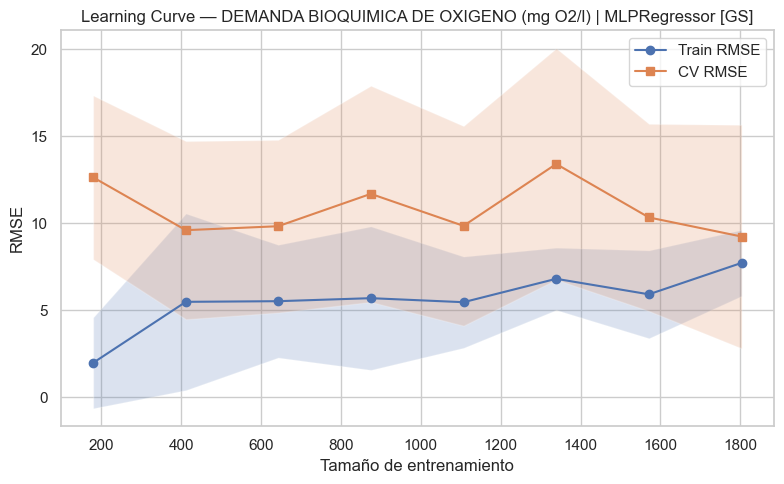

PermutationExplainer explainer: 301it [00:57,  4.59it/s]                         


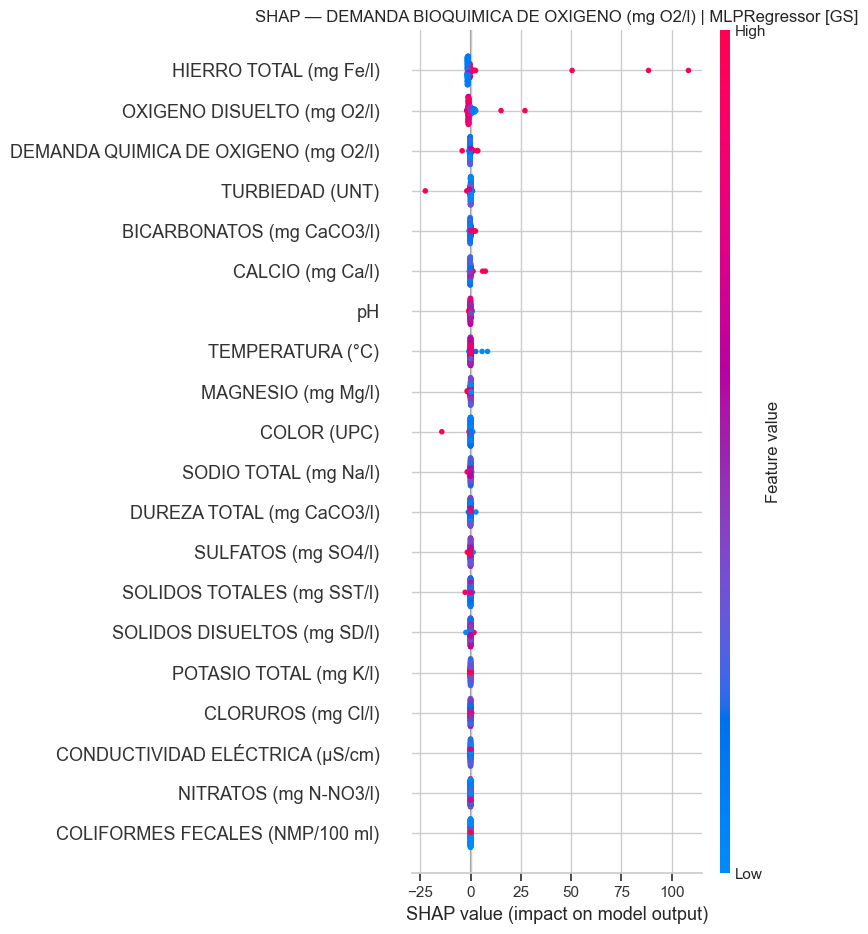

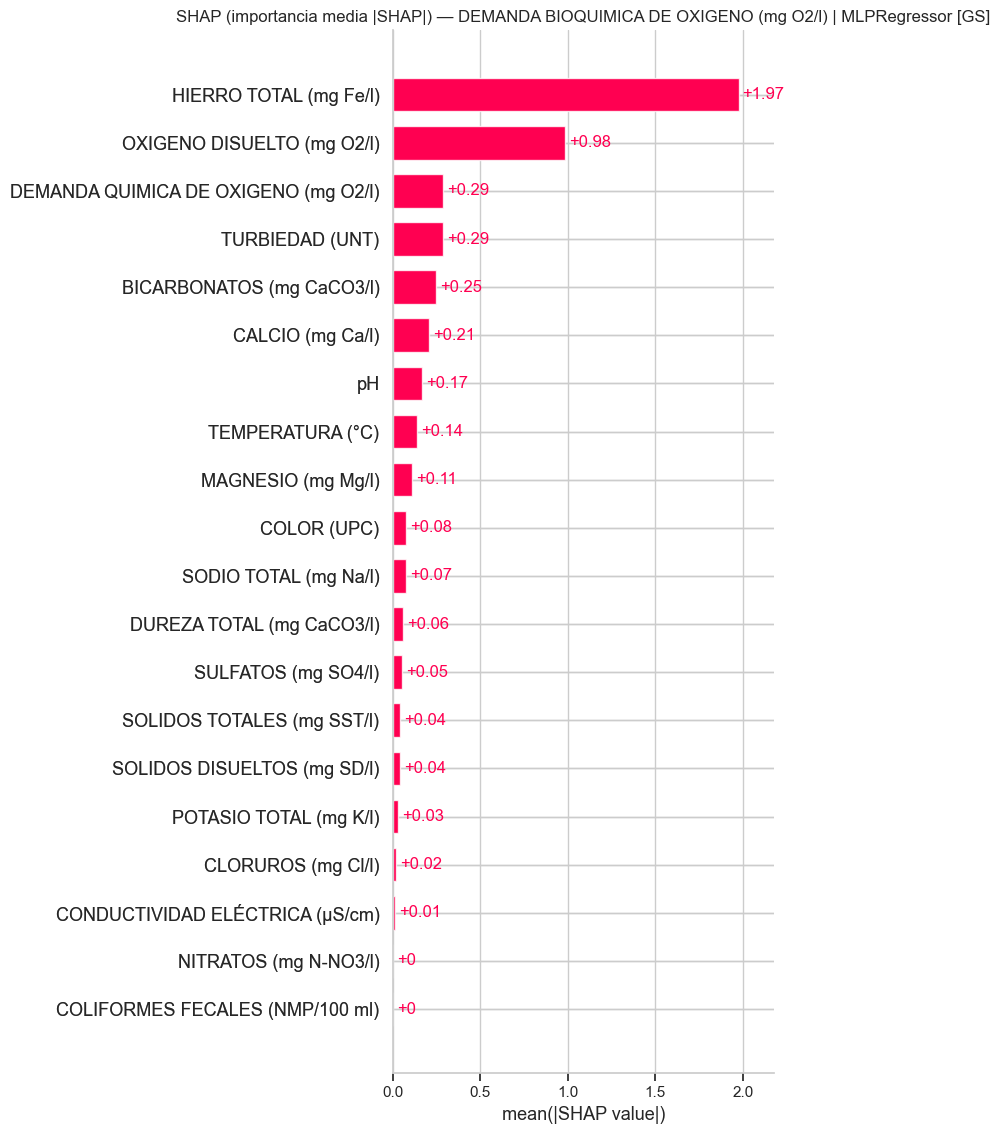

Top features (Permutation Importance):


feature      imp_mean       imp_std
13                HIERRO TOTAL (mg Fe/l)  9.777230e-01  1.601814e-01
7             OXIGENO DISUELTO (mg O2/l)  3.818424e-02  3.643679e-02
3                        TURBIEDAD (UNT)  3.746537e-02  8.913215e-03
9                       CALCIO (mg Ca/l)  8.990053e-03  1.016040e-03
11             BICARBONATOS (mg CaCO3/l)  8.705401e-03  3.167240e-03
6   DEMANDA QUIMICA DE OXIGENO (mg O2/l)  8.668885e-03  1.291418e-03
2                            COLOR (UPC)  5.612481e-04  4.915297e-04
0                                     pH  2.762840e-04  9.009839e-04
17                    CLORUROS (mg Cl/l)  1.217249e-04  1.006726e-04
19       COLIFORMES FECALES (NMP/100 ml) -3.076344e-08  1.100306e-07

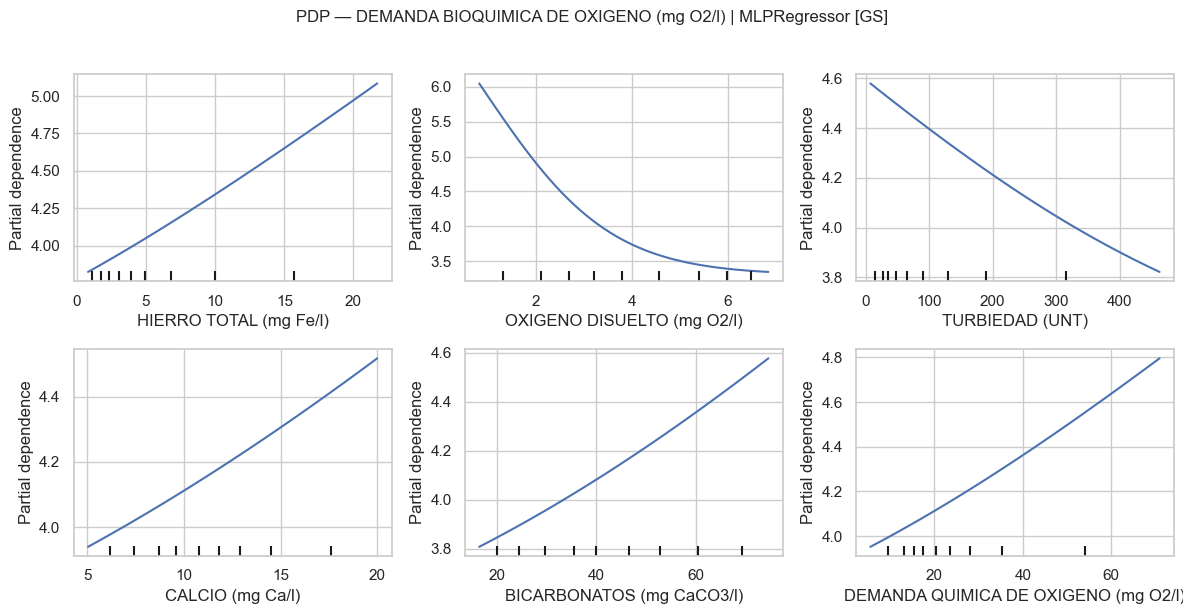


== Sensibilidad ±10% | DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l) | MLPRegressor [GS] ==
R² : 0.916392  |  RMSE: 3.060389  |  MAE: 1.782587


feature  abs_change_mean_+10  \
0                                     pH             0.368113   
7             OXIGENO DISUELTO (mg O2/l)             0.126761   
1                       TEMPERATURA (°C)             0.077651   
11             BICARBONATOS (mg CaCO3/l)             0.071512   
9                       CALCIO (mg Ca/l)             0.053185   
13                HIERRO TOTAL (mg Fe/l)             0.048252   
6   DEMANDA QUIMICA DE OXIGENO (mg O2/l)             0.039097   
10                    MAGNESIO (mg Mg/l)             0.022301   
3                        TURBIEDAD (UNT)             0.019735   
14                 SODIO TOTAL (mg Na/l)             0.015769   
8              DUREZA TOTAL (mg CaCO3/l)             0.015076   
18                   SULFATOS (mg SO4/l)             0.014686   
15                POTASIO TOTAL (mg K/l)             0.007873   
4             SOLIDOS TOTALES (mg SST/l)             0.005811   
12       CONDUCTIVIDAD ELÉCTRICA (µS/cm)             0.005392   

    abs_change_mean_-10  rel_change_mean_%_+10  rel_change_mean_%_-10  \
0              0.462806              -8.649378              10.874332   
7              0.141408              -2.978453               3.322589   
1              0.073555               1.824522              -1.728298   
11             0.070089               1.680286              -1.646850   
9              0.051988               1.249671              -1.221529   
13             0.038260               1.133750              -0.898973   
6              0.038895               0.918644              -0.913902   
10             0.022710              -0.524003               0.533612   
3              0.020803              -0.463713               0.488796   
14             0.015903              -0.370513               0.373660   
8              0.014643               0.354240              -0.344052   
18             0.014822              -0.345066               0.348276   
15             0.007911              -0.184989               0.185879   
4              0.005770               0.136541              -0.135565   
12             0.005395               0.126687              -0.126758   

    rel_change_mean_%_avg  
0                9.761855  
7                3.150521  
1                1.776410  
11               1.663568  
9                1.235600  
13               1.016362  
6                0.916273  
10               0.528807  
3                0.476254  
14               0.372087  
8                0.349146  
18               0.346671  
15               0.185434  
4                0.136053  
12               0.126722

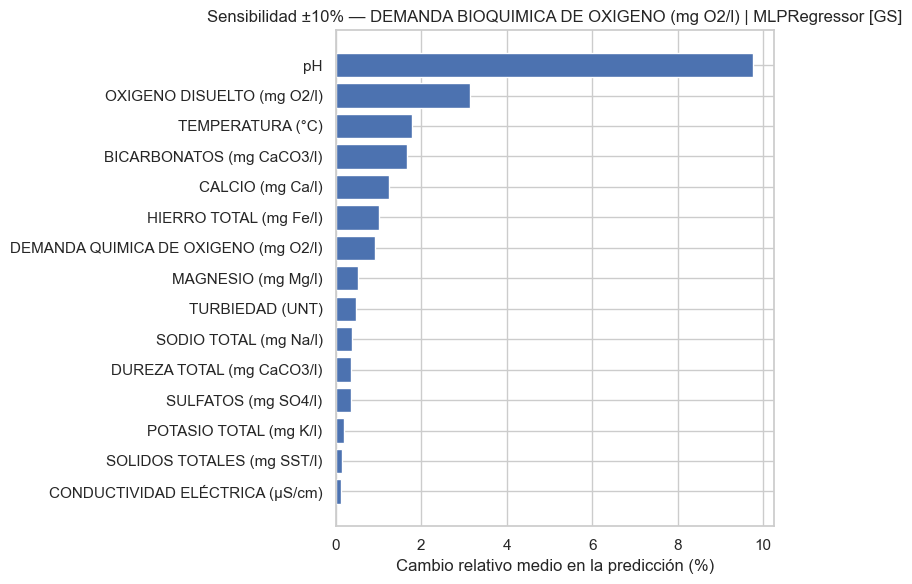


 ============ pH ============

Comparativa de candidatos para 'pH':


modelo        R2      RMSE       MAE
5               XGBoost [Optuna]  0.414973  0.295943  0.212037
9                   XGBoost [GS]  0.396003  0.300703  0.215615
2          RandomForest [Optuna]  0.345196  0.313095  0.224340
8              RandomForest [GS]  0.340332  0.314255  0.225020
10                SVR (RBF) [GS]  0.301384  0.323400  0.237460
3             SVR (RBF) [Optuna]  0.301326  0.323413  0.235958
11             MLPRegressor [GS]  0.216275  0.342533  0.260508
0      LinearRegression [Optuna]  0.189668  0.348299  0.262455
6          LinearRegression [GS]  0.189668  0.348299  0.262455
4          MLPRegressor [Optuna]  0.150839  0.356546  0.273303
1   DecisionTree (CART) [Optuna]  0.066230  0.373887  0.281636
7       DecisionTree (CART) [GS]  0.034030  0.380279  0.281601

Modelo ganador: XGBoost [Optuna]
R²  : 0.414973
RMSE: 0.295943
MAE : 0.212037


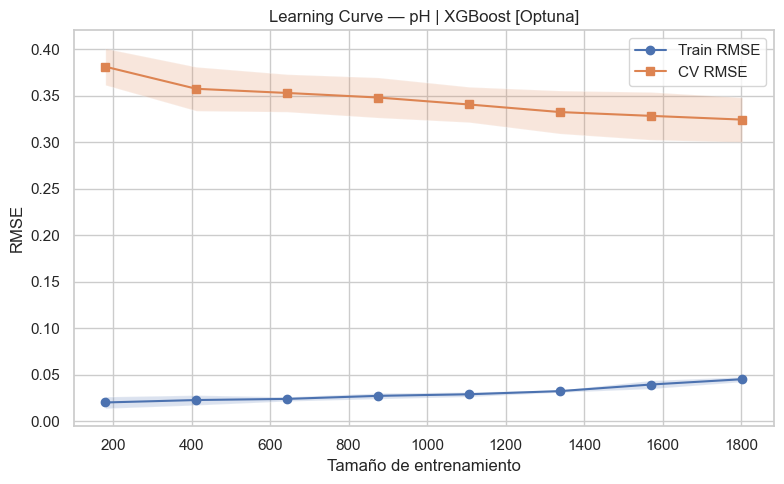

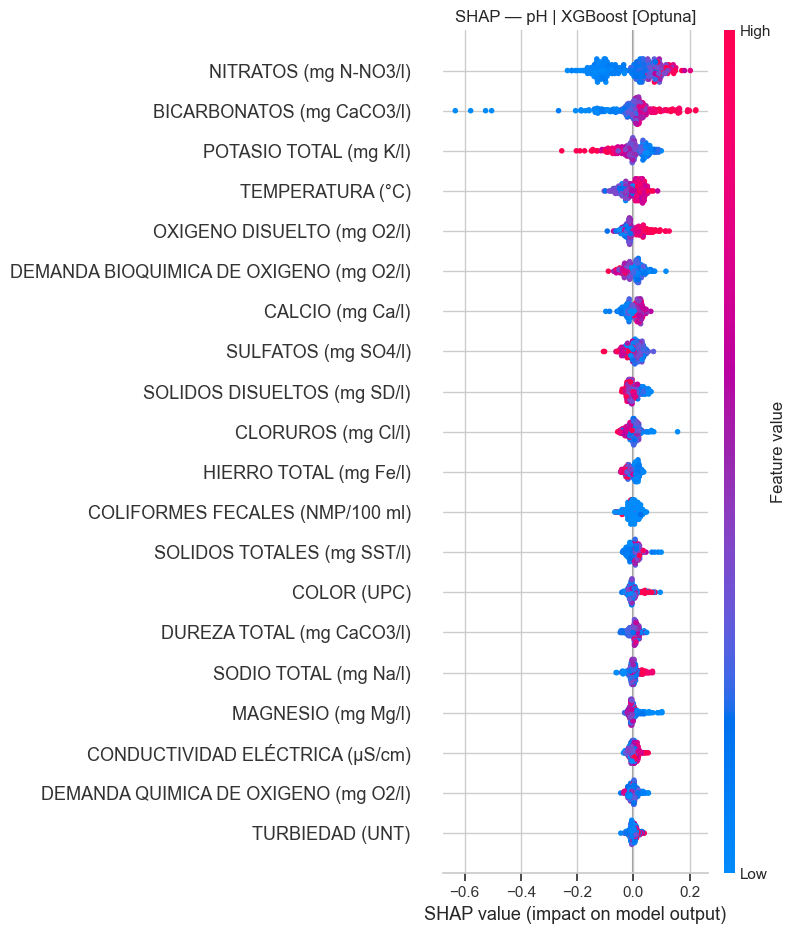

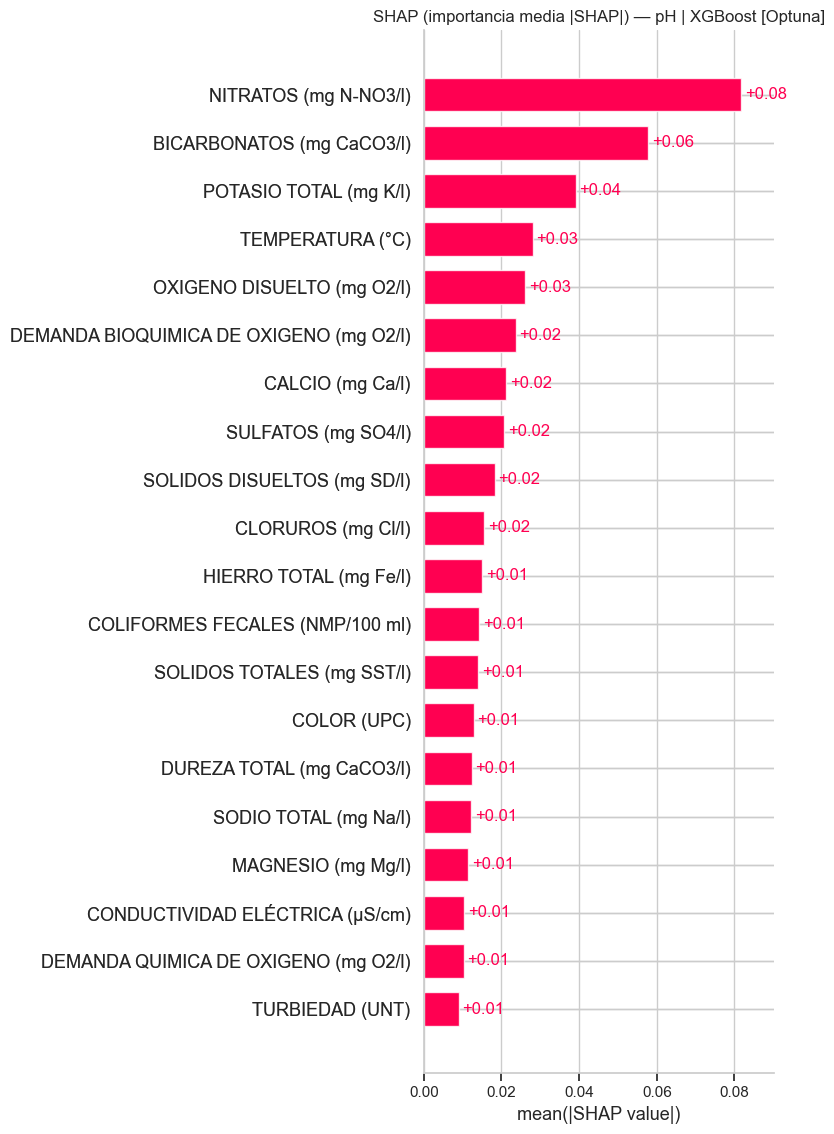

Top features (Permutation Importance):


feature  imp_mean   imp_std
11   BICARBONATOS (mg CaCO3/l)  0.221149  0.040060
16       NITRATOS (mg N-NO3/l)  0.142236  0.019729
0             TEMPERATURA (°C)  0.068924  0.007745
3   SOLIDOS TOTALES (mg SST/l)  0.062352  0.013698
18         SULFATOS (mg SO4/l)  0.044064  0.012462
7   OXIGENO DISUELTO (mg O2/l)  0.042691  0.011848
17          CLORUROS (mg Cl/l)  0.041464  0.008312
9             CALCIO (mg Ca/l)  0.038760  0.011729
15      POTASIO TOTAL (mg K/l)  0.037605  0.015250
2              TURBIEDAD (UNT)  0.034016  0.006064

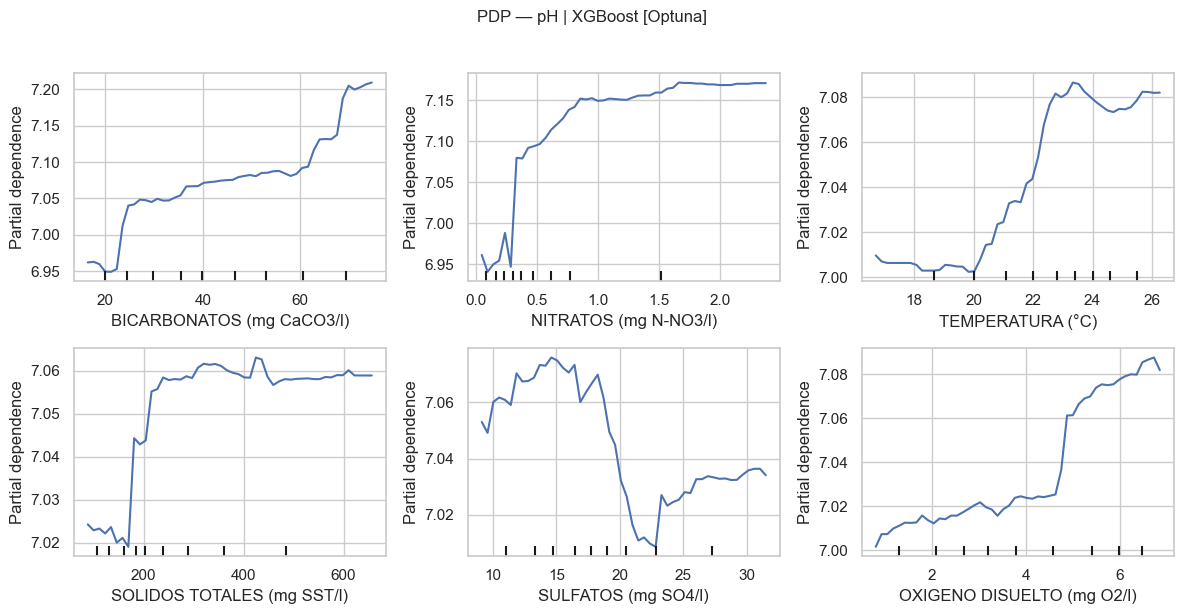


== Sensibilidad ±10% | pH | XGBoost [Optuna] ==
R² : 0.414973  |  RMSE: 0.295943  |  MAE: 0.212037


feature  abs_change_mean_+10  \
0                          TEMPERATURA (°C)             0.016085   
11                BICARBONATOS (mg CaCO3/l)             0.017128   
15                   POTASIO TOTAL (mg K/l)             0.013223   
7                OXIGENO DISUELTO (mg O2/l)             0.009649   
16                    NITRATOS (mg N-NO3/l)             0.006621   
4               SOLIDOS DISUELTOS (mg SD/l)             0.004322   
18                      SULFATOS (mg SO4/l)             0.005813   
9                          CALCIO (mg Ca/l)             0.003705   
5   DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)             0.004460   
3                SOLIDOS TOTALES (mg SST/l)             0.002998   
12          CONDUCTIVIDAD ELÉCTRICA (µS/cm)             0.002635   
17                       CLORUROS (mg Cl/l)             0.003147   
14                    SODIO TOTAL (mg Na/l)             0.002337   
2                           TURBIEDAD (UNT)             0.001389   
19          COLIFORMES FECALES (NMP/100 ml)             0.000164   

    abs_change_mean_-10  rel_change_mean_%_+10  rel_change_mean_%_-10  \
0              0.031486               0.228069              -0.446442   
11             0.016553               0.242869              -0.234708   
15             0.012231              -0.187488               0.173432   
7              0.007941               0.136820              -0.112594   
16             0.010114               0.093879              -0.143405   
4              0.006896              -0.061277               0.097780   
18             0.005199              -0.082426               0.073724   
9              0.006189               0.052528              -0.087754   
5              0.005037              -0.063244               0.071425   
3              0.003822               0.042514              -0.054198   
12             0.003982               0.037369              -0.056463   
17             0.002373              -0.044617               0.033650   
14             0.002474               0.033130              -0.035084   
2              0.001945               0.019689              -0.027579   
19             0.002972              -0.002319               0.042136   

    rel_change_mean_%_avg  
0                0.337255  
11               0.238789  
15               0.180460  
7                0.124707  
16               0.118642  
4                0.079529  
18               0.078075  
9                0.070141  
5                0.067335  
3                0.048356  
12               0.046916  
17               0.039134  
14               0.034107  
2                0.023634  
19               0.022227

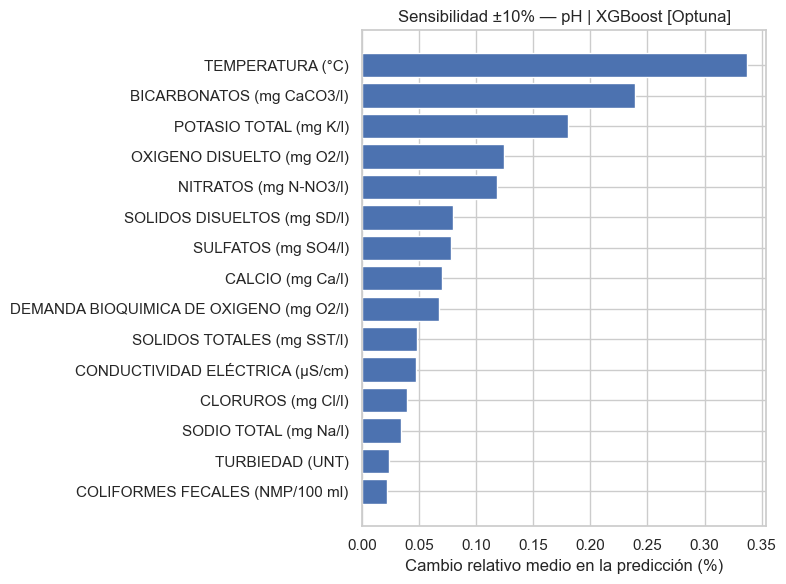

In [156]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", font_scale=1.0)

from sklearn.base import clone
from sklearn.model_selection import KFold, train_test_split, learning_curve
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Utilidades

def pick_best_model(y_col, X_train, X_test, y_train, y_test):
    """
    Recorre todos los modelos guardados (Optuna y/o GridSearch) para la variable y_col,
    los evalúa en el split dado y devuelve (name, fitted_model) del que tenga menor RMSE.
    """
    candidatos = {}

    # Candidatos de Optuna
    if 'best_models_optuna' in globals() and y_col in best_models_optuna:
        for name, est in best_models_optuna[y_col].items():
            candidatos[f"{name} [Optuna]"] = est

    # Candidatos de GridSearch
    if 'best_models_grid' in globals() and y_col in best_models_grid:
        for name, est in best_models_grid[y_col].items():
            key = f"{name} [GS]"
            if key not in candidatos:
                candidatos[key] = est

    if not candidatos:
        raise RuntimeError(f"No hay modelos guardados para '{y_col}'.")

    filas = []
    mejor_name, mejor_est, mejor_rmse = None, None, float("inf")

    for name, est in candidatos.items():
        model = clone(est)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        rmse = root_mean_squared_error(y_test, pred)
        mae  = mean_absolute_error(y_test, pred)
        r2   = r2_score(y_test, pred)
        filas.append({"modelo": name, "R2": r2, "RMSE": rmse, "MAE": mae})

        if rmse < mejor_rmse:
            mejor_rmse = rmse
            mejor_name = name
            mejor_est  = model

    print(f"\nComparativa de candidatos para '{y_col}':")
    display(pd.DataFrame(filas).sort_values("RMSE"))

    return mejor_name, mejor_est


def get_Xy_for_target(y_col):
    """Construye X,y alineados para el objetivo dado (quita la y de X si estuviera)."""
    assert y_col in df_imputed.columns
    X = df_vif_filtered.copy()
    if y_col in X.columns:
        X = X.drop(columns=[y_col])
    y = df_imputed.loc[X.index, y_col]
    return X, y


def plot_learning_curves(model, X, y, title):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=clone(model),
        X=X, y=y,
        cv=cv,
        scoring="neg_root_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 8),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )
    train_rmse = -train_scores
    val_rmse = -val_scores

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_rmse.mean(axis=1), marker="o", label="Train RMSE")
    plt.fill_between(train_sizes,
                     train_rmse.mean(axis=1)-train_rmse.std(axis=1),
                     train_rmse.mean(axis=1)+train_rmse.std(axis=1),
                     alpha=0.2)
    plt.plot(train_sizes, val_rmse.mean(axis=1), marker="s", label="CV RMSE")
    plt.fill_between(train_sizes,
                     val_rmse.mean(axis=1)-val_rmse.std(axis=1),
                     val_rmse.mean(axis=1)+val_rmse.std(axis=1),
                     alpha=0.2)
    plt.title(f"Learning Curve — {title}")
    plt.xlabel("Tamaño de entrenamiento")
    plt.ylabel("RMSE")
    plt.legend()
    plt.tight_layout()
    plt.show()


def shap_summary(model, X_train, X_test, title):
    """
    SHAP para varios tipos de modelo (árbol, lineal, pipeline/MLP/SVR).
    Muestra beeswarm y bar con muestreo para acelerar.
    """
    try:
        import shap
        # --- muestreo para rapidez ---
        n_bg = min(300, len(X_train))
        n_te = min(300, len(X_test))
        X_bg = X_train.sample(n_bg, random_state=42)
        X_te = X_test.sample(n_te, random_state=42)

        # Detectar árbol / lineal / otros
        from sklearn.pipeline import Pipeline
        from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
        from sklearn.svm import SVR
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

        # Si es pipeline, la "función" de predicción será el pipeline completo
        predict_fn = model.predict

        # Caso 1: modelos de árbol => TreeExplainer (rápido)
        final_est = model
        if isinstance(model, Pipeline):
            final_est = model.steps[-1][1]

        is_tree = isinstance(final_est, (DecisionTreeRegressor,
                                         RandomForestRegressor,
                                         GradientBoostingRegressor))
        # XGBoost si está
        try:
            from xgboost import XGBRegressor
            is_tree = is_tree or isinstance(final_est, XGBRegressor)
        except Exception:
            pass

        if is_tree:
            # Para pipelines con árbol, TreeExplainer puede aceptar el pipeline completo en versiones recientes,
            # pero si falla, usamos la función de predicción genérica.
            try:
                explainer = shap.TreeExplainer(final_est)
                # Para TreeExplainer hay que transformar X_te como entra al estimador final:
                X_te_trans = X_te if not isinstance(model, Pipeline) else model[:-1].transform(X_te)
                shap_values = explainer(X_te_trans)
            except Exception:
                explainer = shap.Explainer(predict_fn, X_bg)
                shap_values = explainer(X_te)

        # Caso 2: lineales => LinearExplainer
        elif isinstance(final_est, (LinearRegression, Ridge, Lasso, ElasticNet)):
            try:
                explainer = shap.LinearExplainer(model, X_bg)  # pipeline completo
                shap_values = explainer(X_te)
            except Exception:
                explainer = shap.Explainer(predict_fn, X_bg)
                shap_values = explainer(X_te)

        # Caso 3: otros (SVR, MLP, etc.) => función de predicción + Kernel/Auto
        else:
            # Explainer genérico partiendo de una función de predicción
            try:
                explainer = shap.Explainer(predict_fn, X_bg)  # auto elige Kernel
                shap_values = explainer(X_te)
            except Exception:
                # Fall-back explícito a KernelExplainer (más lento)
                kb = shap.sample(X_bg, min(100, len(X_bg)))
                explainer = shap.KernelExplainer(predict_fn, kb)
                shap_values = explainer.shap_values(X_te, nsamples=100)

        # --- Plots ---
        plt.figure(figsize=(8,5))
        shap.plots.beeswarm(shap_values, max_display=20, show=False)
        plt.title(f"SHAP — {title}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8,5))
        shap.plots.bar(shap_values, max_display=20, show=False)
        plt.title(f"SHAP (importancia media |SHAP|) — {title}")
        plt.tight_layout()
        plt.show()

    except ImportError:
        print("Instala SHAP: pip install shap")
    except Exception as e:
        print(f"No se pudo calcular/plotear SHAP: {e}")


def top_features_via_permutation(model, X_test, y_test, k=6):
    perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    df_pi = pd.DataFrame({
        "feature": X_test.columns,
        "imp_mean": perm.importances_mean,
        "imp_std": perm.importances_std
    }).sort_values("imp_mean", ascending=False)
    return df_pi, df_pi["feature"].head(k).tolist()


def pdp_plots(model, X, top_vars, title):
    if not top_vars:
        return
    n = len(top_vars)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    ax = np.array(ax).reshape(-1)
    for i, feat in enumerate(top_vars):
        try:
            PartialDependenceDisplay.from_estimator(
                model, X, [feat], ax=ax[i], kind="average", grid_resolution=50
            )
        except Exception as e:
            ax[i].set_title(f"PDP {feat} (error)")
            ax[i].text(0.5, 0.5, str(e), ha="center")
    for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])
    fig.suptitle(f"PDP — {title}", y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()


def sensitivity_plus_minus_10(model, X_test, y_test, title, rel=True):
    base_pred = model.predict(X_test)
    base_mean = np.mean(base_pred)

    rows = []
    Xc = X_test.copy()

    for feat in Xc.columns:
        s = pd.to_numeric(Xc[feat], errors="coerce")
        if not np.isfinite(s).any():
            continue

        Xp = Xc.copy(); Xp[feat] = s * 1.10
        pred_p = model.predict(Xp)
        delta_p = np.mean(pred_p) - base_mean

        Xm = Xc.copy(); Xm[feat] = s * 0.90
        pred_m = model.predict(Xm)
        delta_m = np.mean(pred_m) - base_mean

        if rel and abs(base_mean) > 1e-12:
            rel_p = 100 * delta_p / base_mean
            rel_m = 100 * delta_m / base_mean
            rel_avg = (abs(rel_p) + abs(rel_m)) / 2.0
            rows.append([feat, abs(delta_p), abs(delta_m), rel_p, rel_m, rel_avg])
        else:
            rows.append([feat, abs(delta_p), abs(delta_m), np.nan, np.nan, np.nan])

    cols = ["feature", "abs_change_mean_+10", "abs_change_mean_-10",
            "rel_change_mean_%_+10", "rel_change_mean_%_-10", "rel_change_mean_%_avg"]
    df_sens = pd.DataFrame(rows, columns=cols).sort_values(
        "rel_change_mean_%_avg", ascending=False
    )

    print(f"\n== Sensibilidad ±10% | {title} ==")
    print(f"R² : {r2_score(y_test, base_pred):.6f}  |  RMSE: {root_mean_squared_error(y_test, base_pred):.6f}  |  MAE: {mean_absolute_error(y_test, base_pred):.6f}")
    display(df_sens.head(15))

    top = df_sens.head(15).iloc[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(top["feature"], top["rel_change_mean_%_avg"])
    plt.xlabel("Cambio relativo medio en la predicción (%)")
    plt.title(f"Sensibilidad ±10% — {title}")
    plt.tight_layout()
    plt.show()

    return df_sens


# EJECUCIÓN PARA CADA OBJETIVO

for y_col in objetivos:   # usa 'objetivos'
    print("\n", "="*12, y_col, "="*12)

    X_all, y_all = get_Xy_for_target(y_col)
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.2, random_state=42
    )

    # ahora sí elige el mejor según RMSE real
    model_name, model = pick_best_model(y_col, X_train, X_test, y_train, y_test)

    y_pred = model.predict(X_test)
    print(f"Modelo ganador: {model_name}")
    print(f"R²  : {r2_score(y_test, y_pred):.6f}")
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.6f}")
    print(f"MAE : {mean_absolute_error(y_test, y_pred):.6f}")

    # 1) Learning curves
    plot_learning_curves(model, X_all, y_all, title=f"{y_col} | {model_name}")

    # 2) SHAP
    shap_summary(model, X_train, X_test, title=f"{y_col} | {model_name}")

    # 3) PDP sobre top features
    df_pi, top_vars = top_features_via_permutation(model, X_test, y_test, k=6)
    print("Top features (Permutation Importance):")
    display(df_pi.head(10))
    pdp_plots(model, X_test, top_vars, title=f"{y_col} | {model_name}")

    # 4) Sensibilidad ±10%
    _ = sensitivity_plus_minus_10(model, X_test, y_test, title=f"{y_col} | {model_name}", rel=True)